# Glass Classification Analysis

## Introduction
This notebook solves a classification problem to **identify the type of glass based on its chemical composition** using the "Glass Classification" dataset from Kaggle. The goal is to **build and evaluate machine learning models to accurately predict glass types, optimizing their performance through hyperparameter tunings**. We will use multiple classification models, including **Naive Bayes, Logistic Regression, SVC (Linear, Poly, Rbf, Sigmoid), Decision Tree, Random Forest, Gradient Boosting, and AdaBoost**, and compare their performance using accuracy score.

**Dataset**: [Glass Classification] (https://www.kaggle.com/datasets/uciml/glass)

**Objectives**:
 - Do data preprocessing & data visualization as it was in the 1st lab work
 - Solve classification problem for the selected dataset.
 - Use examples/fisher_irises.ipynb as baseline for your experiments
 - Try to optimize hyperparameters of some model

*Vasylenko Sofiia CS42*

## 1. Import Libraries
We import necessary libraries for data manipulation, modeling, and visualization.

In [17]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from imblearn.over_sampling import SMOTE

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## 2. Load data

In [20]:
glass_df = pd.read_csv("data/glass.csv")
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
features = glass_df.columns[:-1].tolist()
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

## 3. Explore and Visualise The Dataset

In [22]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [23]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [24]:
glass_df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


*There is no missing values in the dataset.*

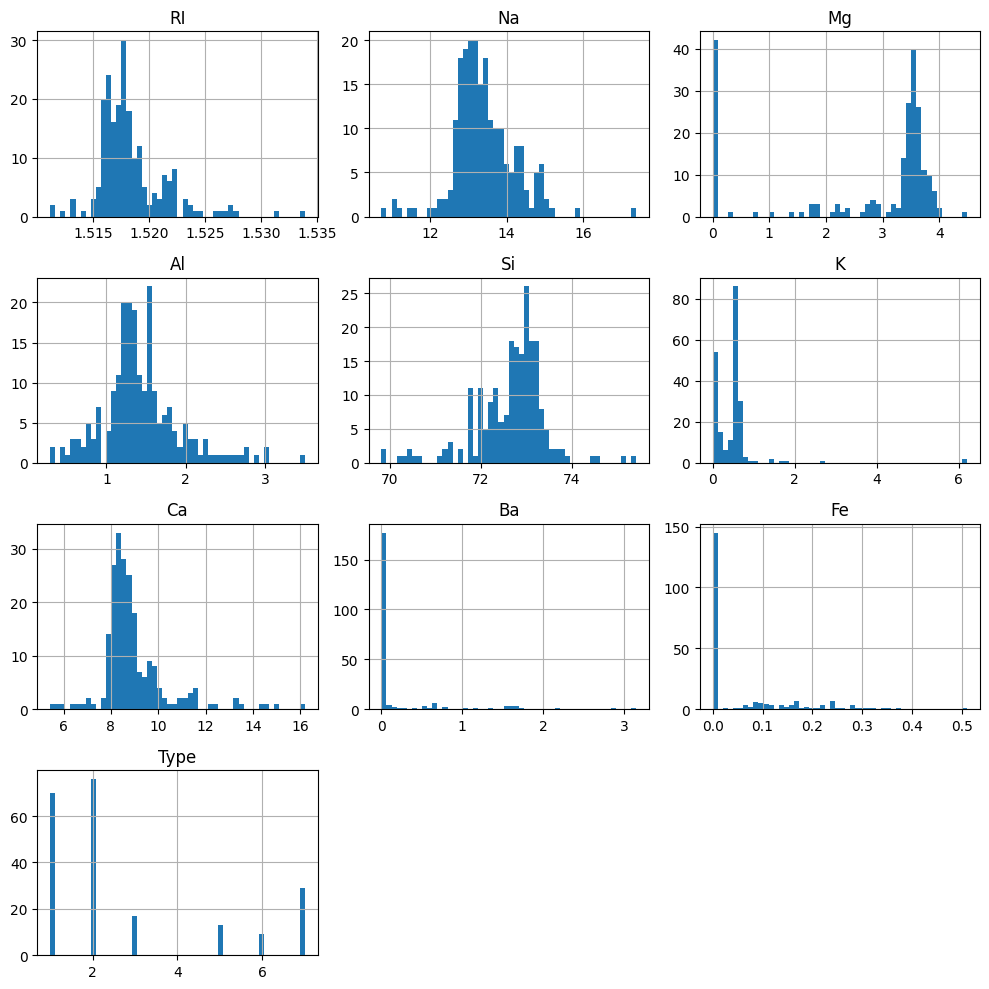

In [25]:
glass_df.hist(figsize=(10, 10), bins=50)
plt.tight_layout()

*None of the features follow a normal distribution. The attributes Fe, Ba, Ca, and K show the highest levels of skewness. Additionally, the distributions of K and Ba appear to include numerous outliers.*

Text(0.5, 1.0, 'Correlation matrix')

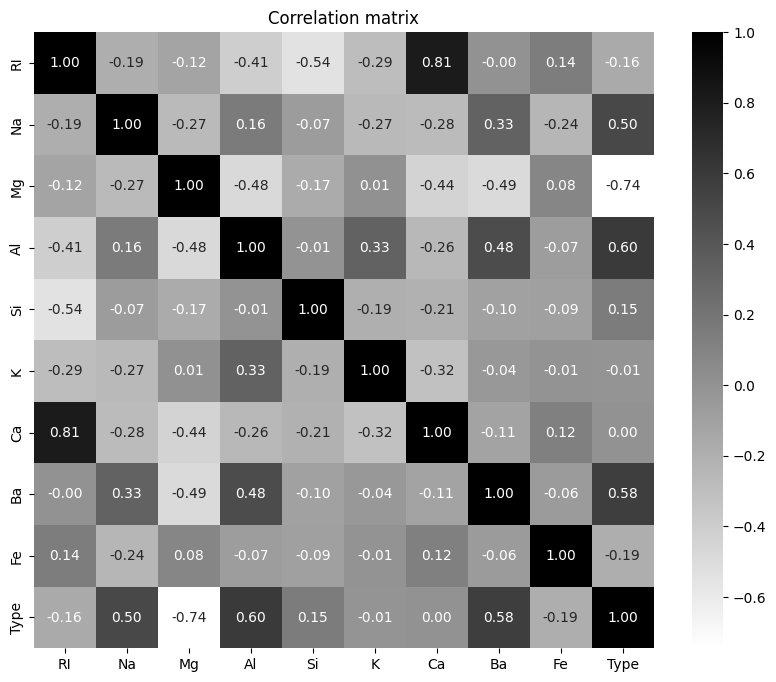

In [26]:
corr_matrix = glass_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='binary', fmt='.2f')
plt.title('Correlation matrix')

*A strong positive relationship appears to exist between RI and Ca.*

In [27]:
glass_df.shape

(214, 10)

In [28]:
target_column = 'Type'
glass_df[target_column].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


Text(0.5, 1.0, 'Distribution of the glass types')

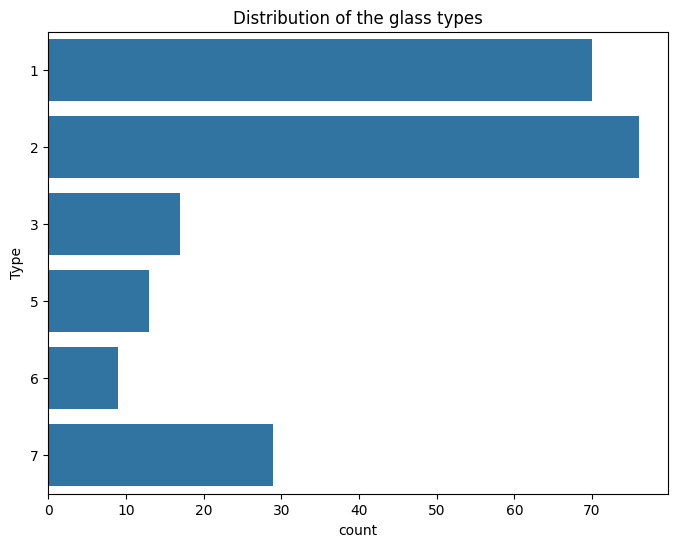

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Type', data=glass_df, orient='h')
plt.title('Distribution of the glass types')

<Figure size 800x800 with 0 Axes>

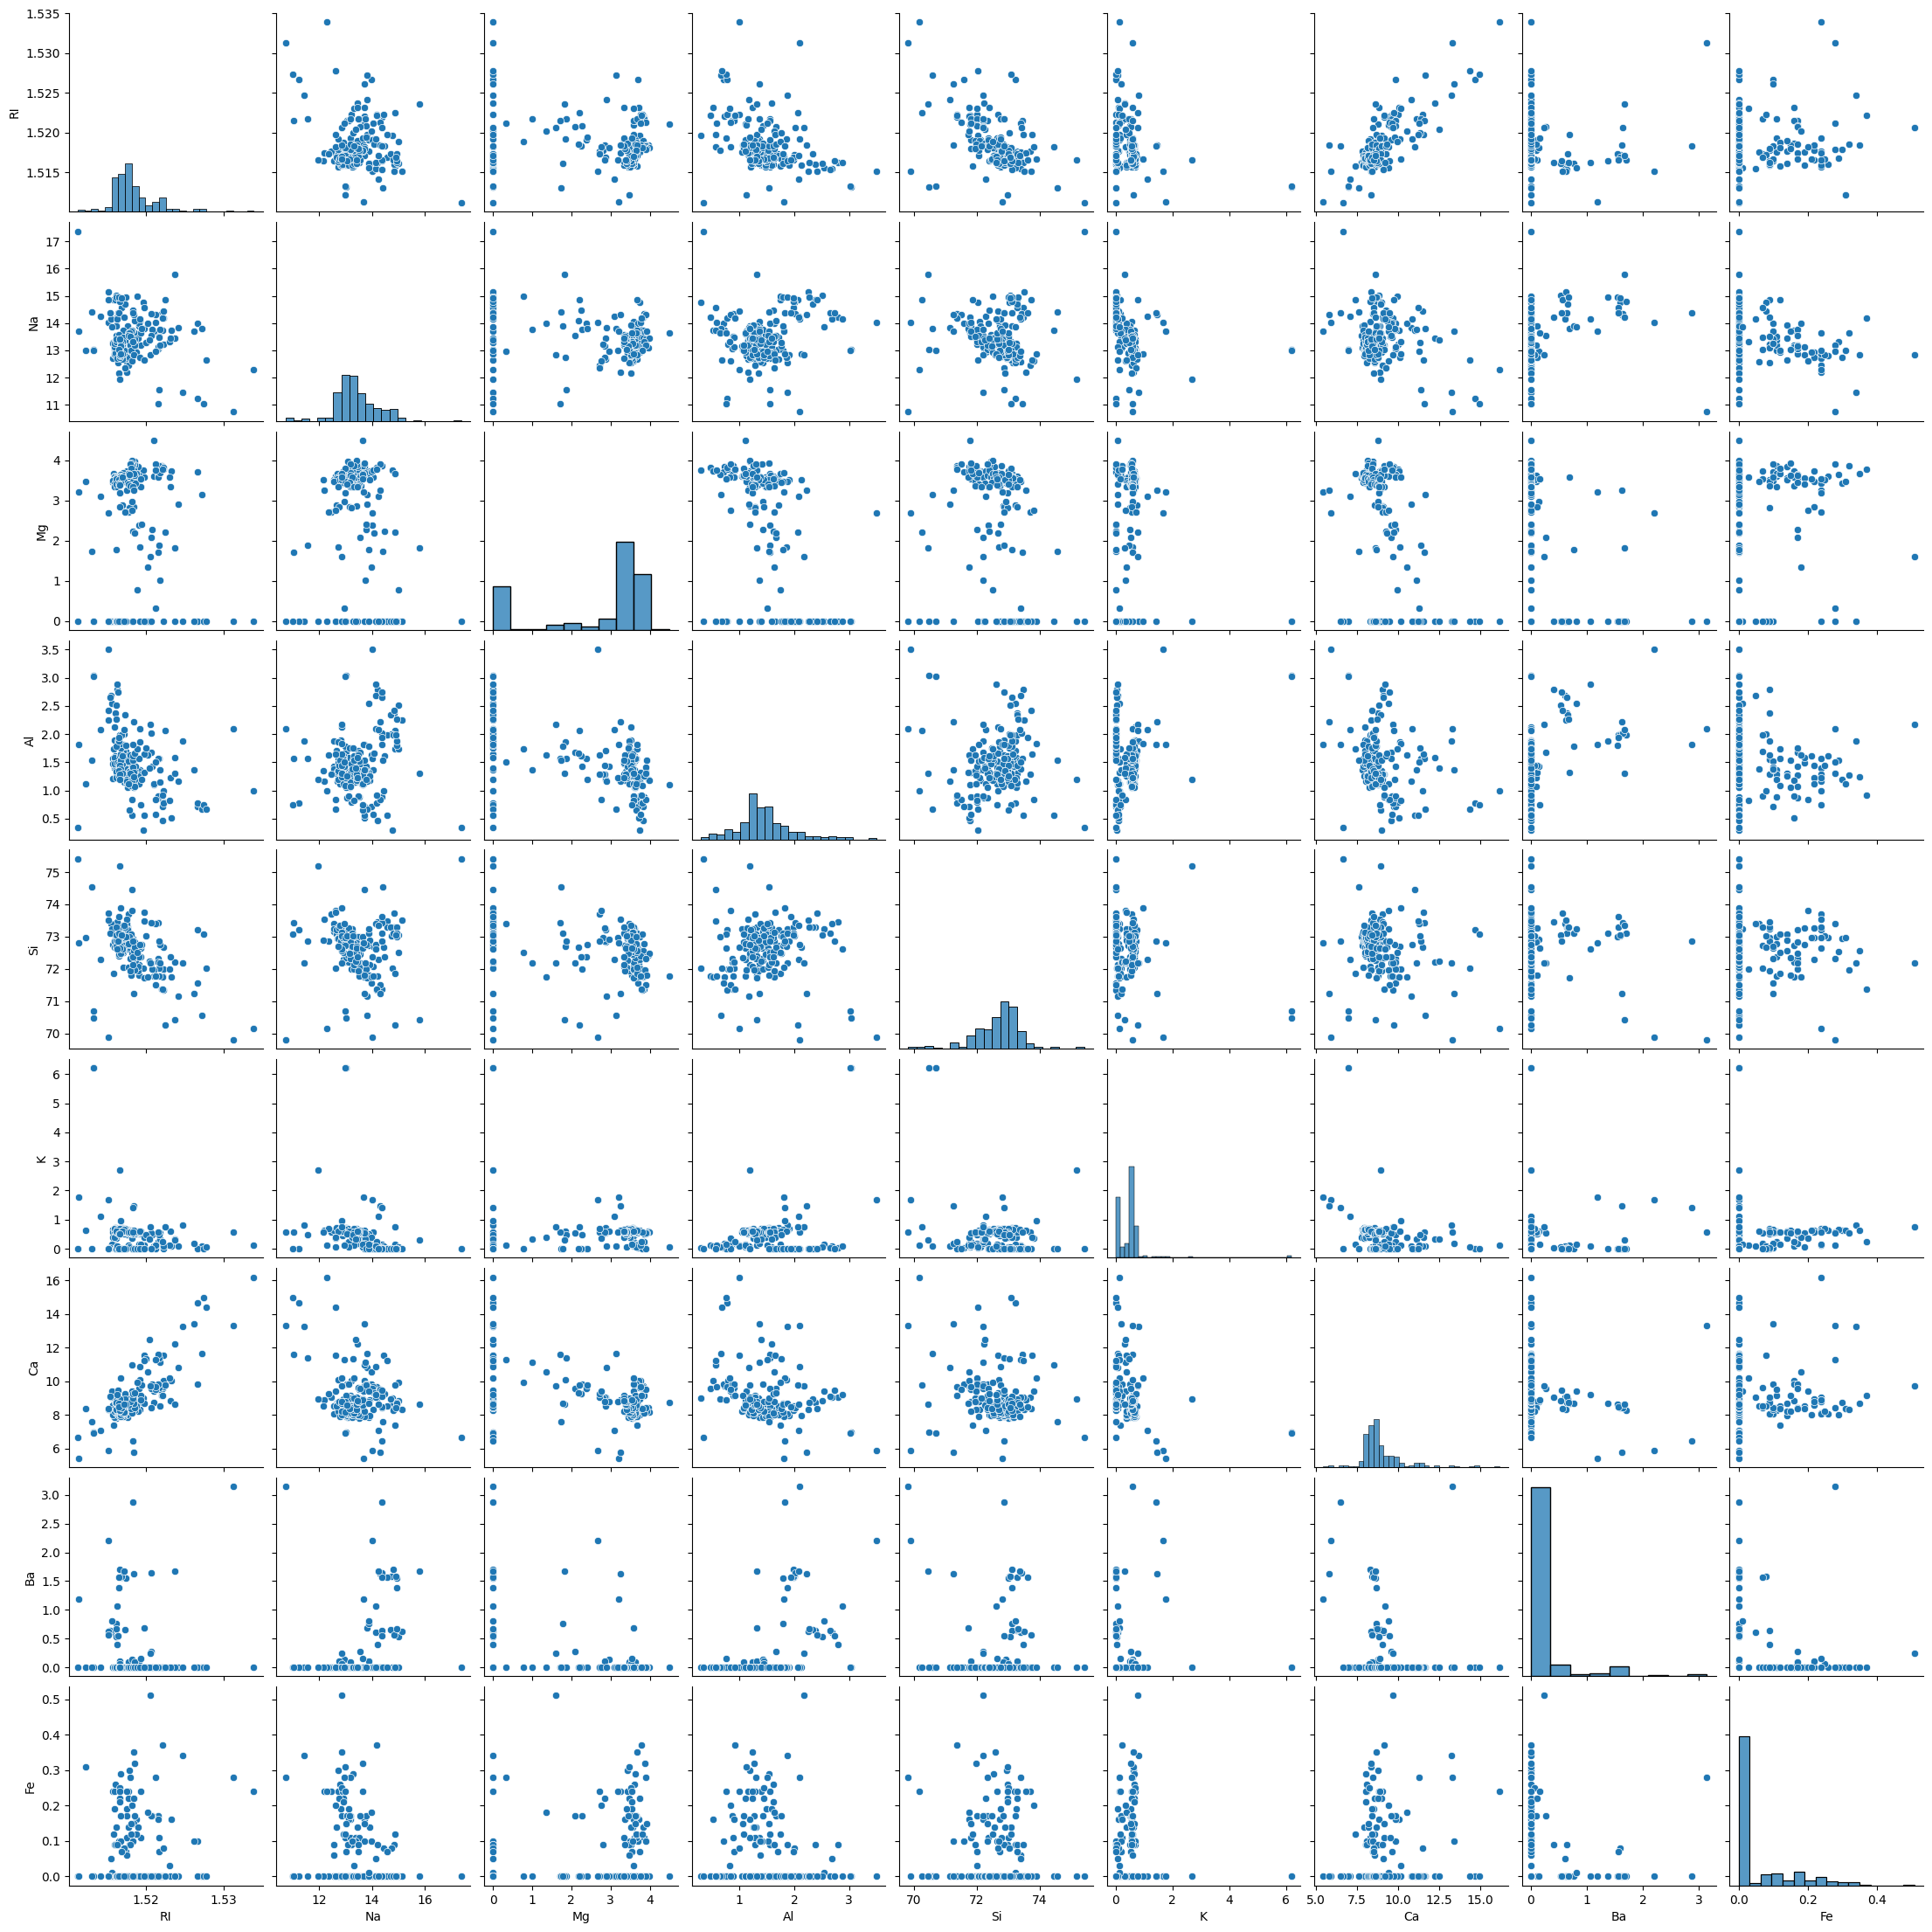

In [30]:
plt.figure(figsize=(8,8))
sns.pairplot(glass_df[features])
plt.show()

## 4. Data Preprocessing

In [31]:
X = glass_df.drop(target_column, axis=1)
y = glass_df[target_column]

# Balance classes with SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
  X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_balanced_scaled = scaler.fit_transform(X_balanced)

pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(X_balanced_scaled)

tsne_3d = TSNE(n_components=3, random_state=42)
embedded_data_3d = tsne_3d.fit_transform(X_balanced_scaled)

print("Preprocessing Results:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Unique classes in y_train: {np.unique(y_train, return_counts=True)}")
print(f"Unique classes in y_test: {np.unique(y_test, return_counts=True)}")

Preprocessing Results:
X_train shape: (364, 9)
y_train shape: (364,)
X_test shape: (92, 9)
y_test shape: (92,)
Unique classes in y_train: (array([1, 2, 3, 5, 6, 7]), array([61, 61, 61, 60, 60, 61]))
Unique classes in y_test: (array([1, 2, 3, 5, 6, 7]), array([15, 15, 15, 16, 16, 15]))


In [32]:
def visualize_clusters_3d_pca(labels_, clustering_method, label_mapping=None):
    pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
    pca_df_3d['class'] = labels_

    fig = px.scatter_3d(
        pca_df_3d, x='PC1', y='PC2', z='PC3',
        color='class', title=f"PCA 3D, {clustering_method}",
        width=1000, height=600,
        size=[5] * len(pca_df_3d),
    )
    fig.update_traces(marker=dict(size=2))
    fig.show()

def visualize_clusters_3d_tsne(labels_, clustering_method, label_mapping=None):
    tsne_df_3d = pd.DataFrame(data=embedded_data_3d, columns=["Dim 1", "Dim 2", "Dim 3"])
    tsne_df_3d['class'] = labels_

    fig = px.scatter_3d(
        tsne_df_3d, x='Dim 1', y='Dim 2', z='Dim 3',
        color='class', title=f"t-SNE 3D, {clustering_method}",
        width=1000, height=600,
        size=[5] * len(tsne_df_3d),
    )
    fig.update_traces(marker=dict(size=2))
    fig.show()

visualize_clusters_3d_pca(glass_df["Type"], "Original Mapping")
visualize_clusters_3d_tsne(glass_df["Type"], "Original Mapping")


## 5. Train and Evaluate Models



In [33]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(max_iter=200, class_weight='balanced')),
    ('SVC Linear', SVC(kernel='linear', random_state=42, probability=True, class_weight='balanced')),
    ('SVC Poly', SVC(kernel='poly', random_state=42, probability=True, class_weight='balanced')),
    ('SVC Rbf', SVC(kernel='rbf', random_state=42, probability=True, class_weight='balanced')),
    ('SVC Sigmoid', SVC(kernel='sigmoid', random_state=42, probability=True, class_weight='balanced')),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

In [34]:
def train_model(title, model):
  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)

  print(f"Model {title}")
  print(f"Train acc {train_acc}; Test acc {test_acc}")

  report = classification_report(y_test, y_pred_test)
  print(report)

  return y_pred_train, y_pred_test, train_acc, test_acc

In [35]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [36]:
def plot_multiclass_roc(model, X_test, y_test, colors=None):
    y_score = model.predict_proba(X_test)
    classes = np.unique(y_test)
    y_test_onehot = label_binarize(y_test, classes=classes)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    if colors is None:
        colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

    plt.figure(figsize=(10, 8))
    for i, color in zip(range(len(classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for All Classes')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

Model Naive Bayes
Train acc 0.6785714285714286; Test acc 0.6956521739130435
              precision    recall  f1-score   support

           1       0.33      0.27      0.30        15
           2       0.83      0.33      0.48        15
           3       0.42      0.67      0.51        15
           5       0.94      0.94      0.94        16
           6       0.84      1.00      0.91        16
           7       0.93      0.93      0.93        15

    accuracy                           0.70        92
   macro avg       0.72      0.69      0.68        92
weighted avg       0.72      0.70      0.68        92



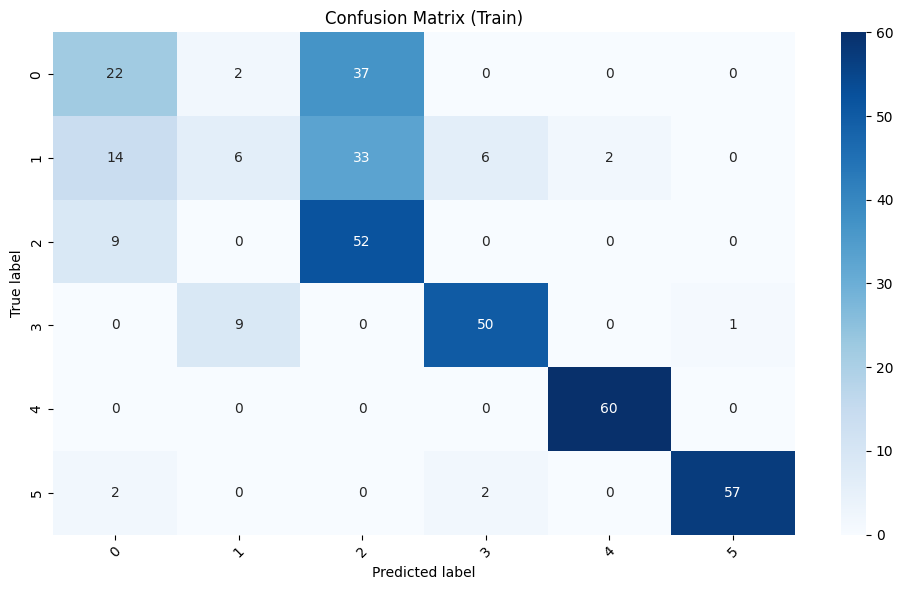

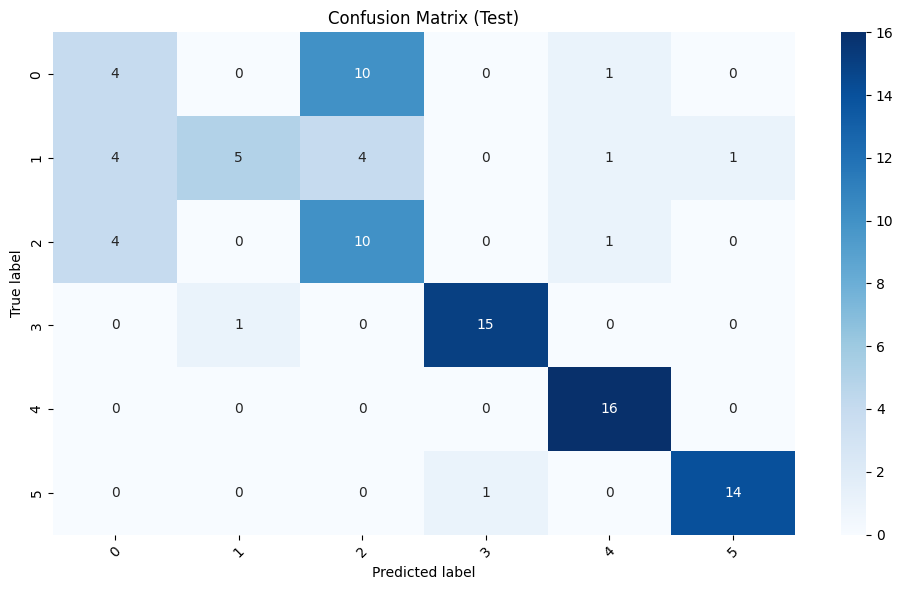

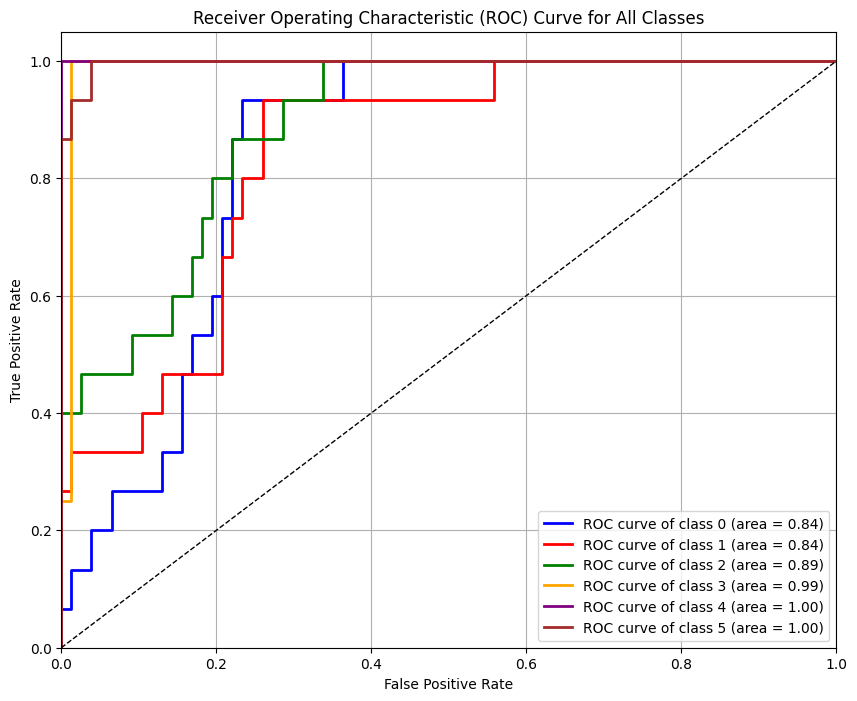

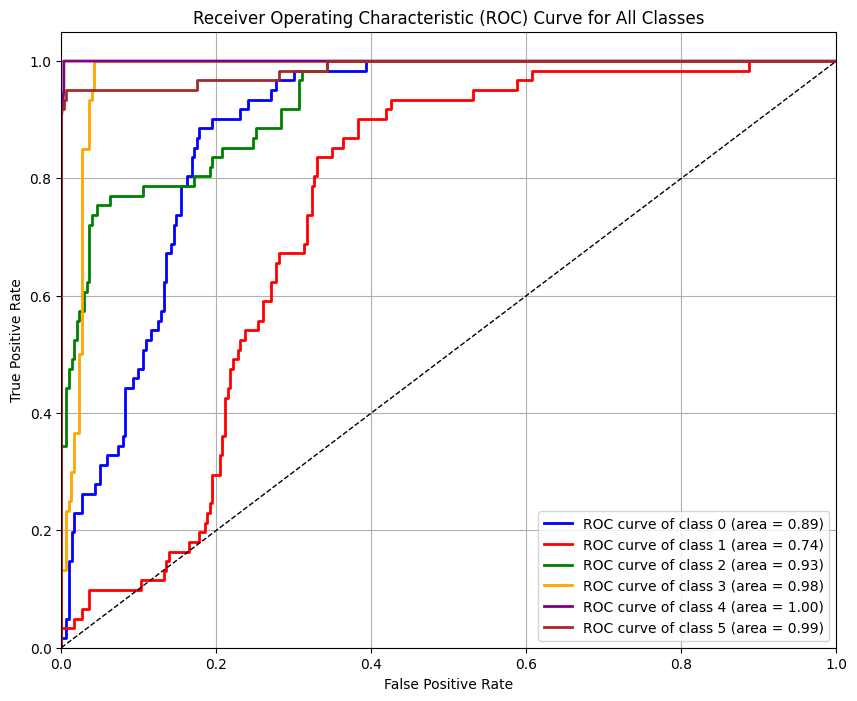

Model Logistic Regression
Train acc 0.8159340659340659; Test acc 0.8152173913043478
              precision    recall  f1-score   support

           1       0.69      0.73      0.71        15
           2       0.83      0.33      0.48        15
           3       0.70      0.93      0.80        15
           5       0.88      0.94      0.91        16
           6       0.94      1.00      0.97        16
           7       0.88      0.93      0.90        15

    accuracy                           0.82        92
   macro avg       0.82      0.81      0.79        92
weighted avg       0.82      0.82      0.80        92



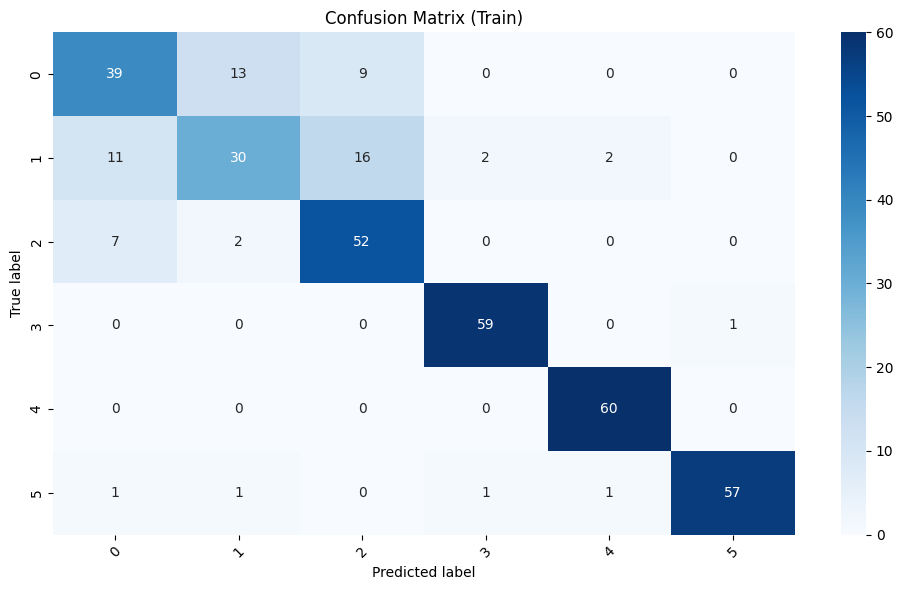

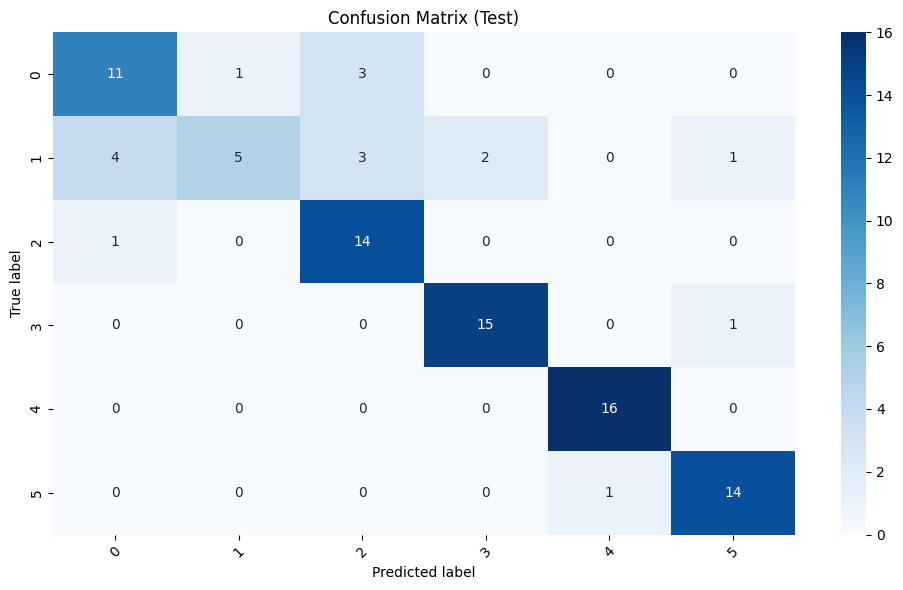

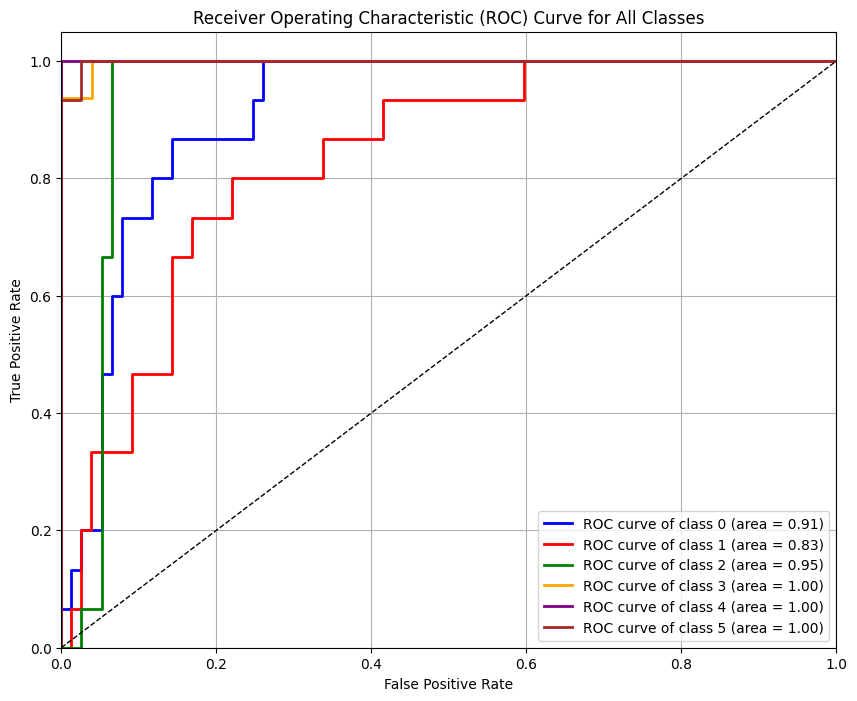

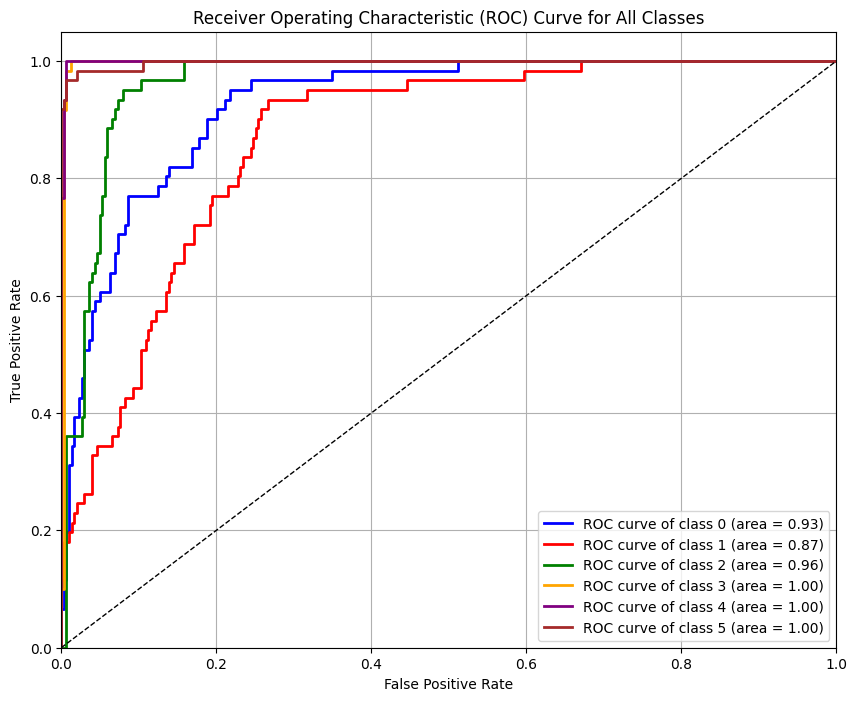

Model SVC Linear
Train acc 0.8543956043956044; Test acc 0.8369565217391305
              precision    recall  f1-score   support

           1       0.69      0.60      0.64        15
           2       0.60      0.40      0.48        15
           3       0.71      1.00      0.83        15
           5       0.94      1.00      0.97        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           0.84        92
   macro avg       0.82      0.83      0.82        92
weighted avg       0.83      0.84      0.82        92



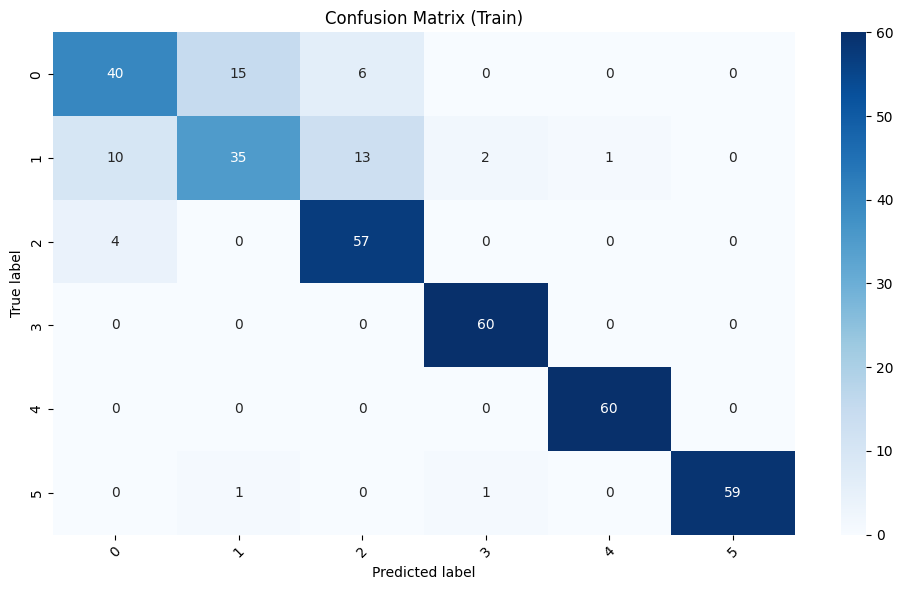

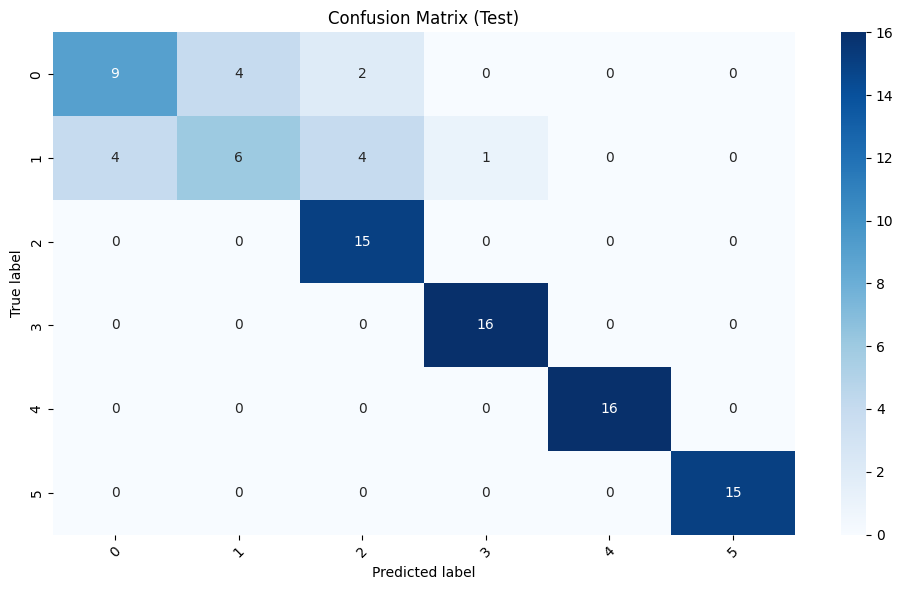

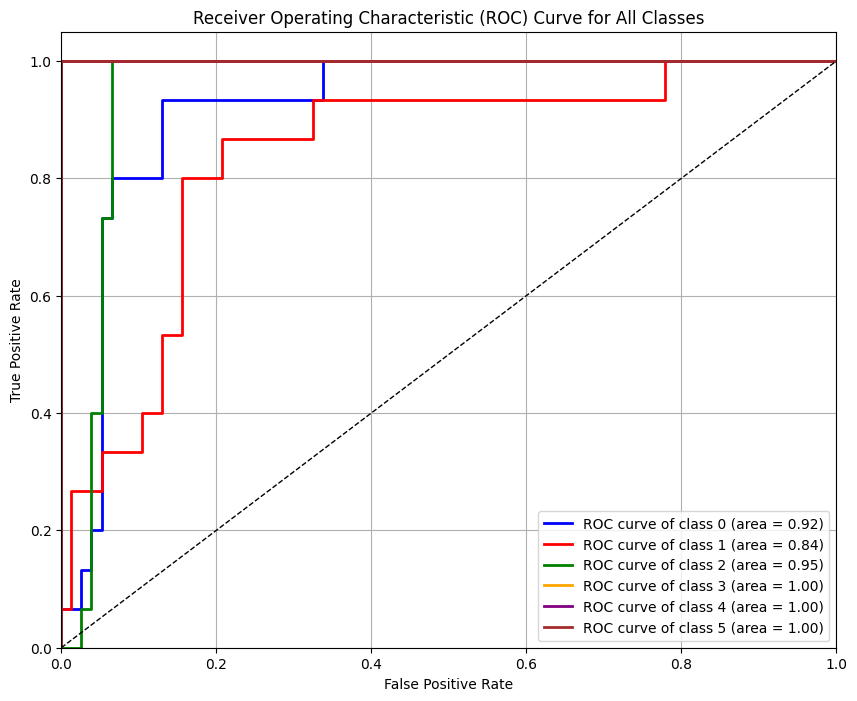

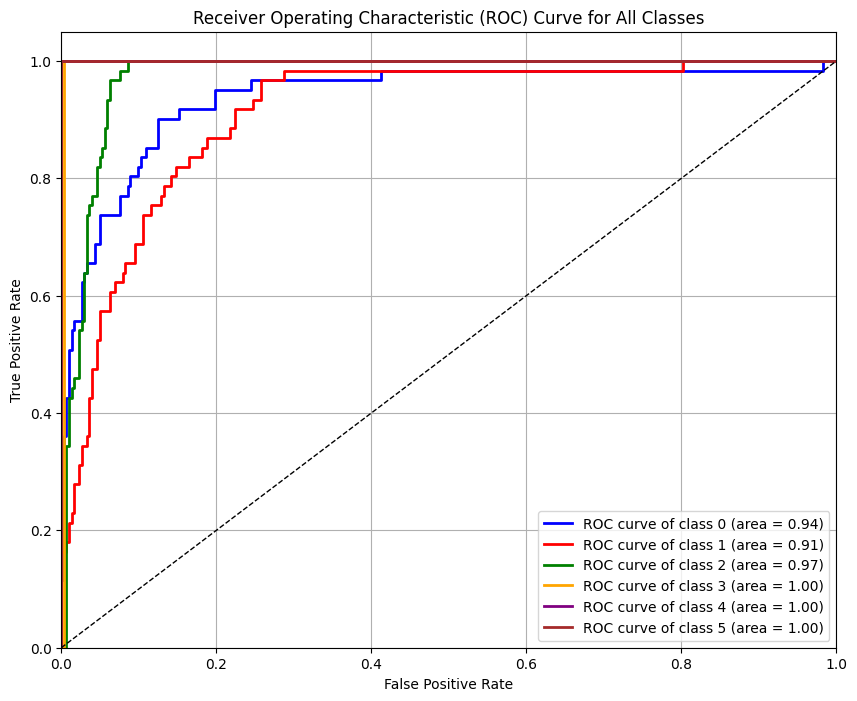

Model SVC Poly
Train acc 0.6373626373626373; Test acc 0.5543478260869565
              precision    recall  f1-score   support

           1       0.33      0.13      0.19        15
           2       0.50      0.07      0.12        15
           3       0.27      0.87      0.41        15
           5       0.94      0.94      0.94        16
           6       1.00      0.50      0.67        16
           7       1.00      0.80      0.89        15

    accuracy                           0.55        92
   macro avg       0.67      0.55      0.54        92
weighted avg       0.68      0.55      0.54        92



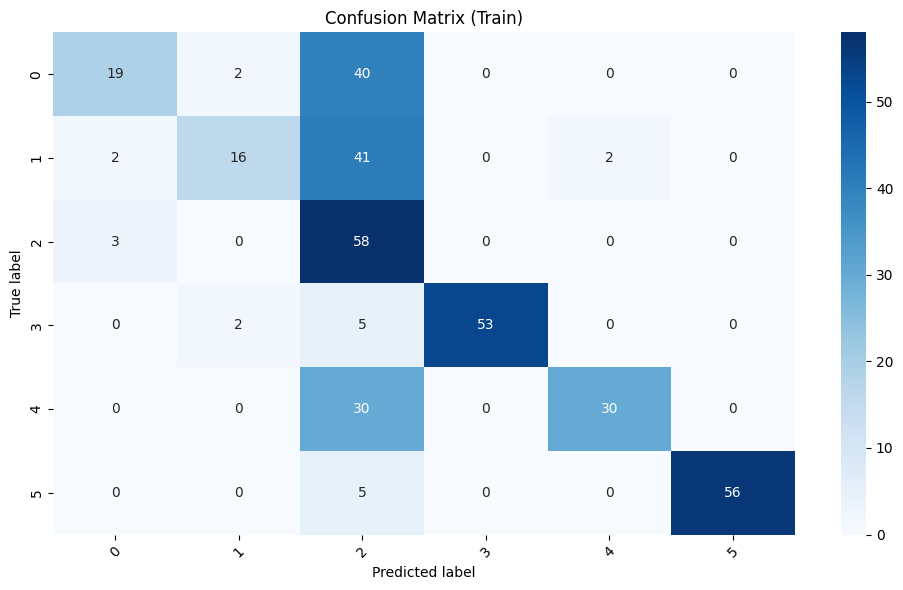

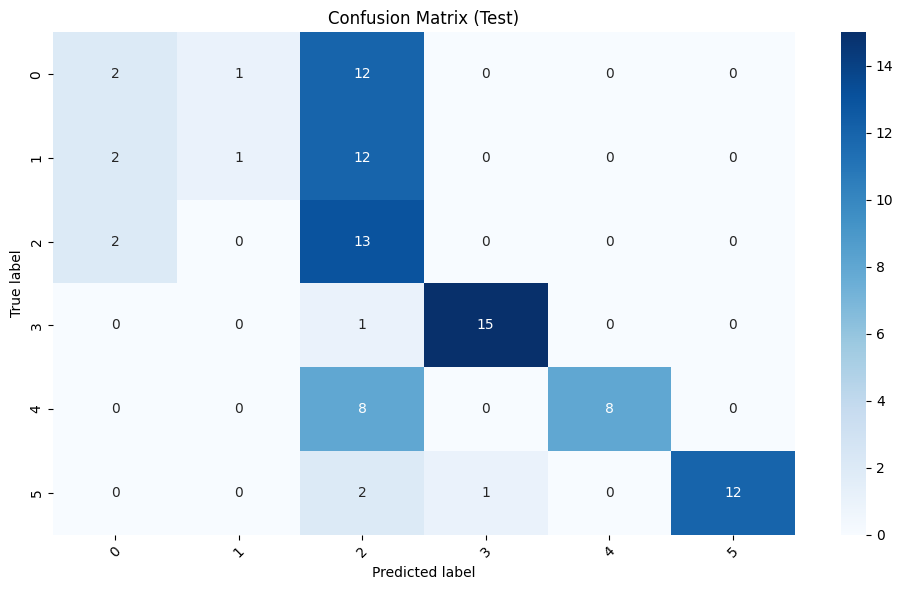

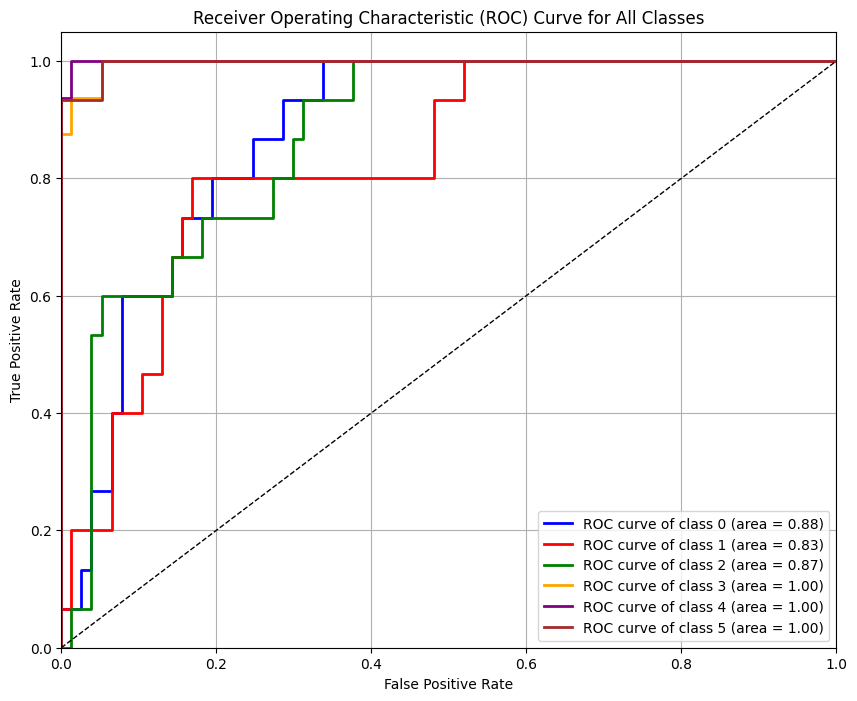

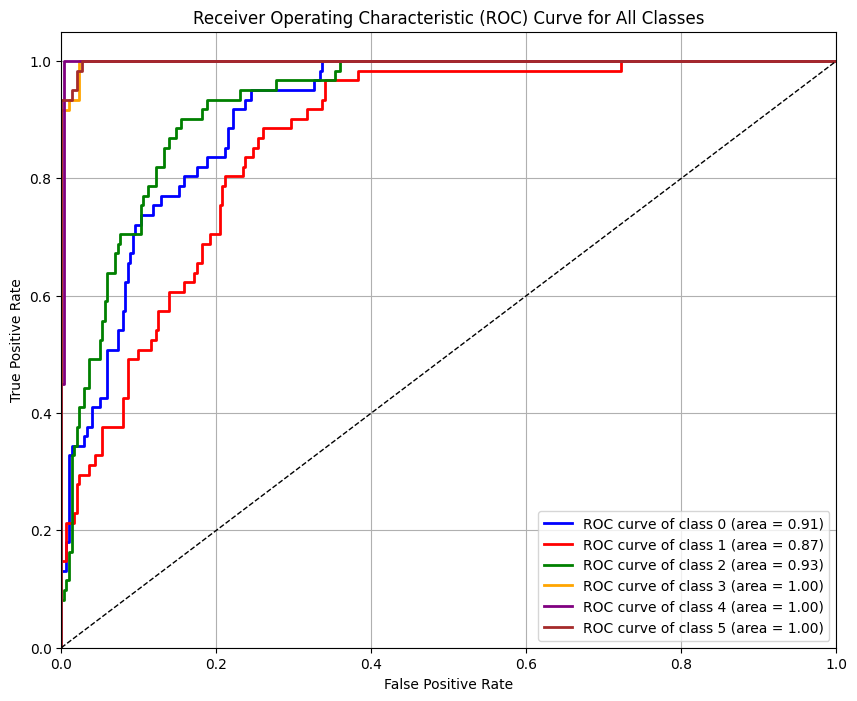

Model SVC Rbf
Train acc 0.8763736263736264; Test acc 0.7934782608695652
              precision    recall  f1-score   support

           1       0.53      0.60      0.56        15
           2       0.58      0.47      0.52        15
           3       0.69      0.73      0.71        15
           5       1.00      0.94      0.97        16
           6       1.00      1.00      1.00        16
           7       0.94      1.00      0.97        15

    accuracy                           0.79        92
   macro avg       0.79      0.79      0.79        92
weighted avg       0.79      0.79      0.79        92



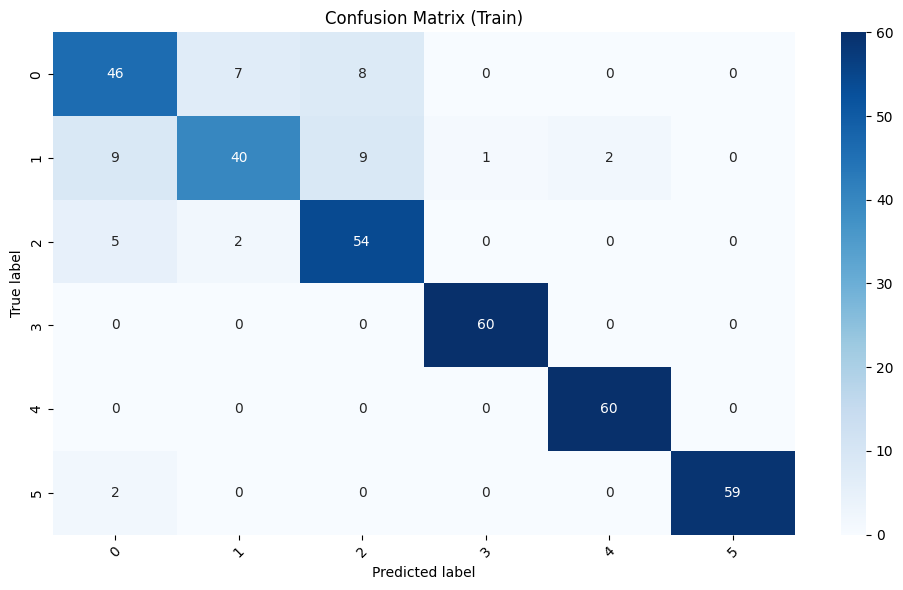

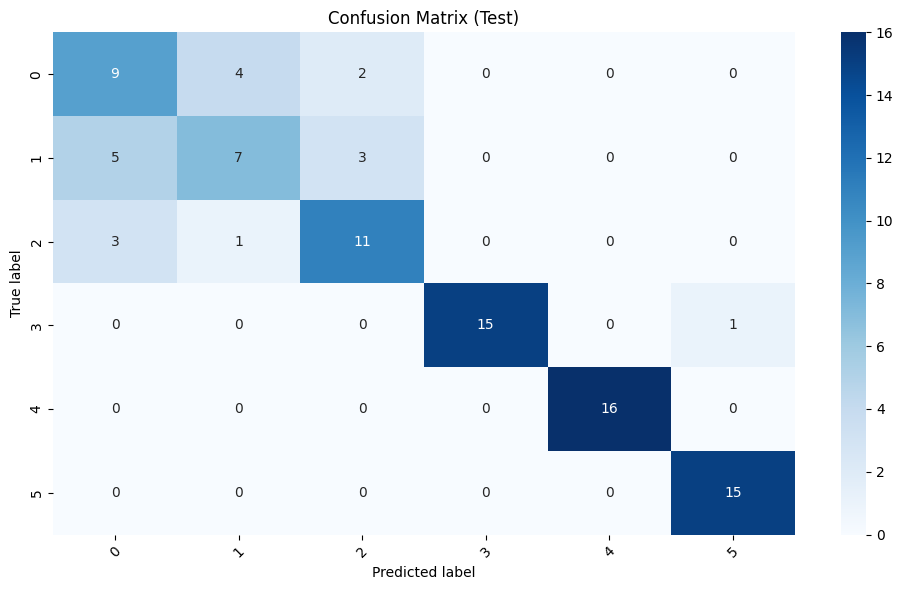

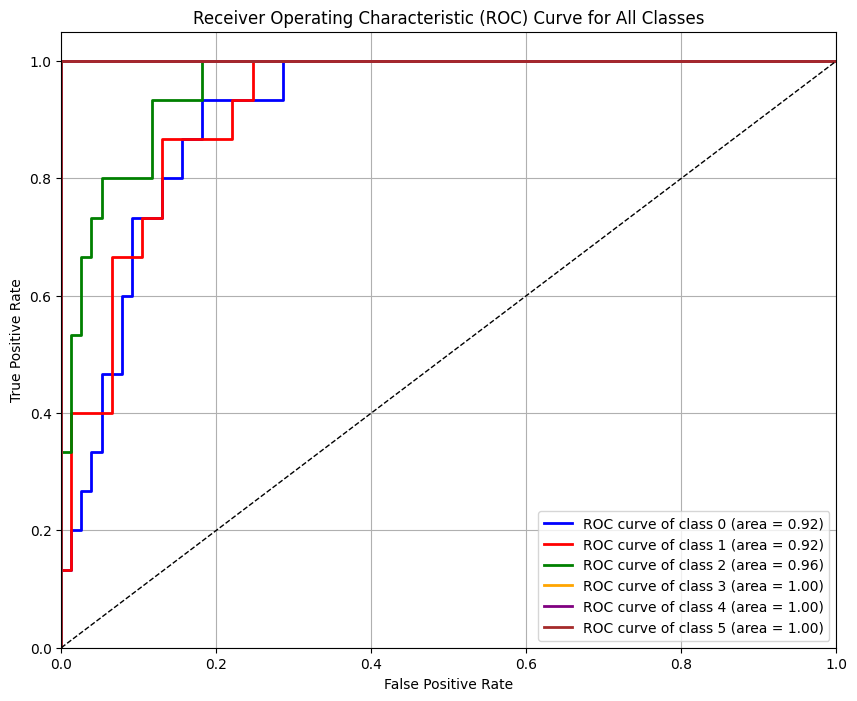

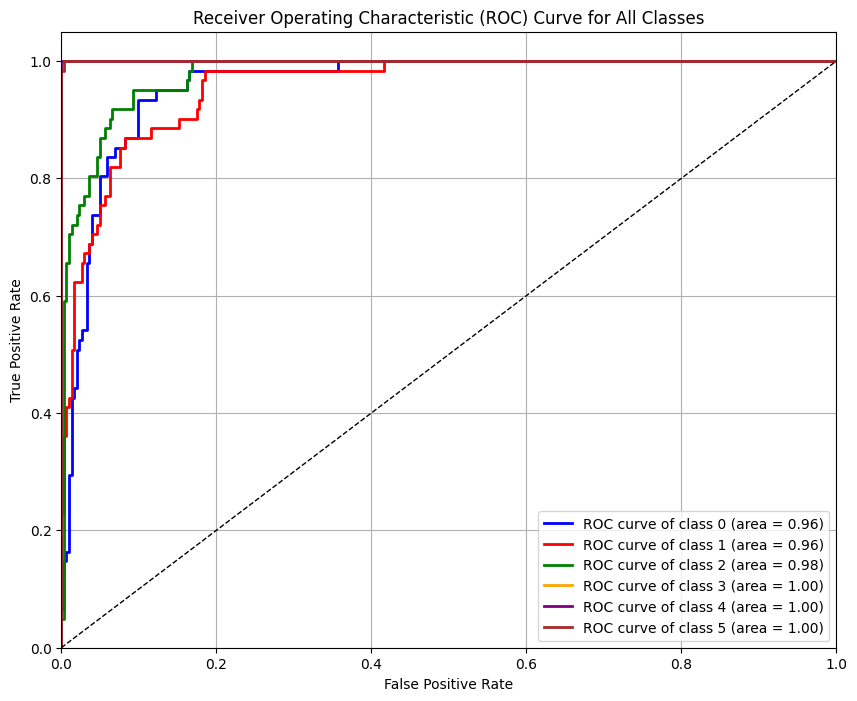

Model SVC Sigmoid
Train acc 0.6703296703296703; Test acc 0.6521739130434783
              precision    recall  f1-score   support

           1       0.50      0.47      0.48        15
           2       0.25      0.13      0.17        15
           3       0.52      0.80      0.63        15
           5       0.71      0.62      0.67        16
           6       0.94      1.00      0.97        16
           7       0.81      0.87      0.84        15

    accuracy                           0.65        92
   macro avg       0.62      0.65      0.63        92
weighted avg       0.63      0.65      0.63        92



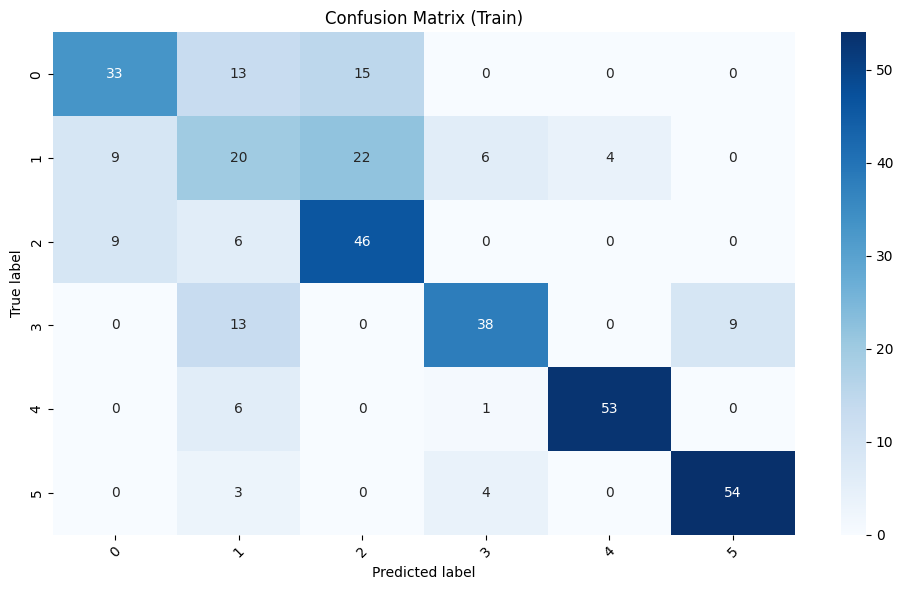

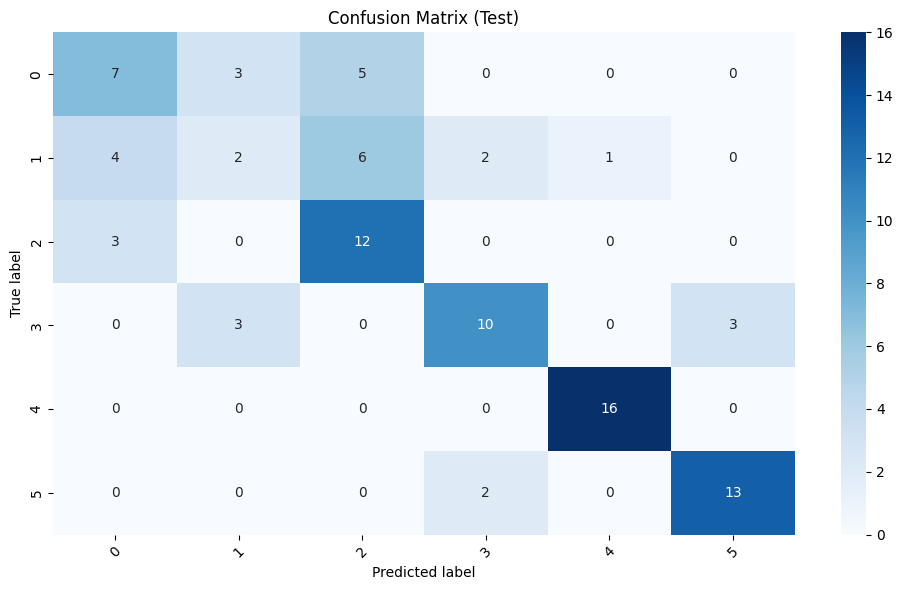

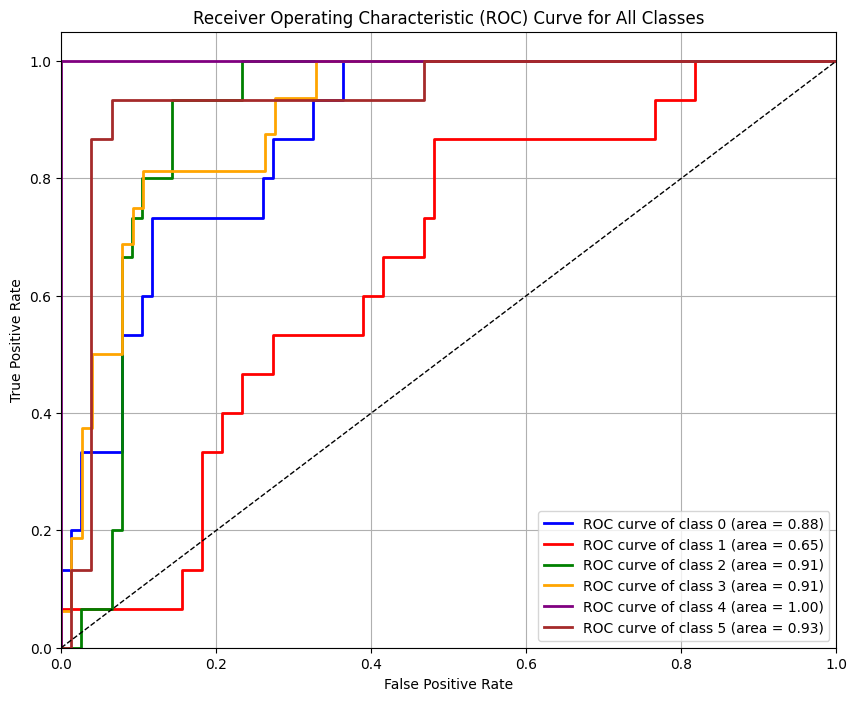

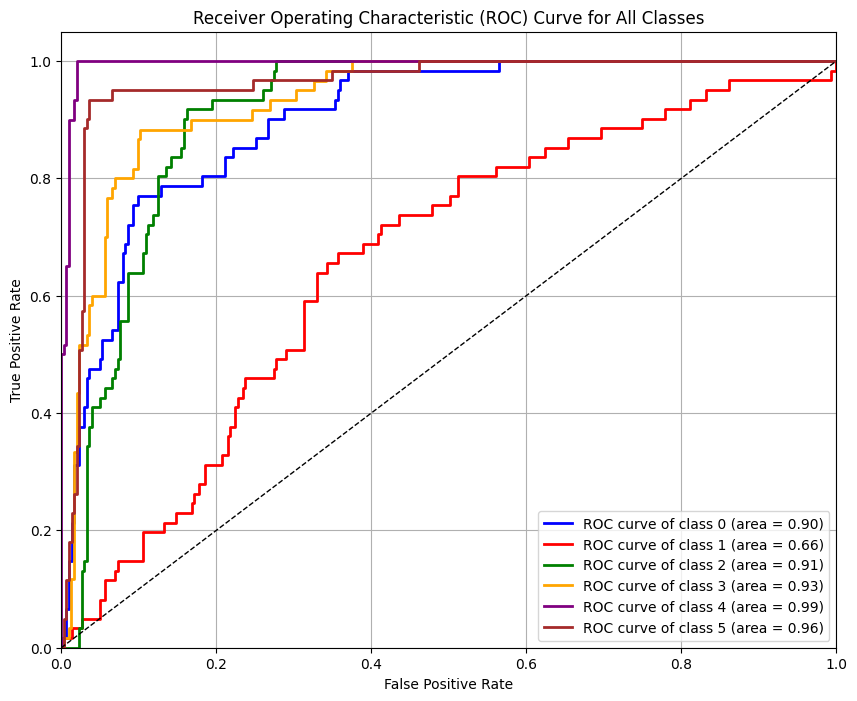

Model Decision Tree
Train acc 1.0; Test acc 0.8586956521739131
              precision    recall  f1-score   support

           1       0.73      0.73      0.73        15
           2       0.77      0.67      0.71        15
           3       0.87      0.87      0.87        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.82      0.93      0.88        15

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.85        92
weighted avg       0.86      0.86      0.86        92



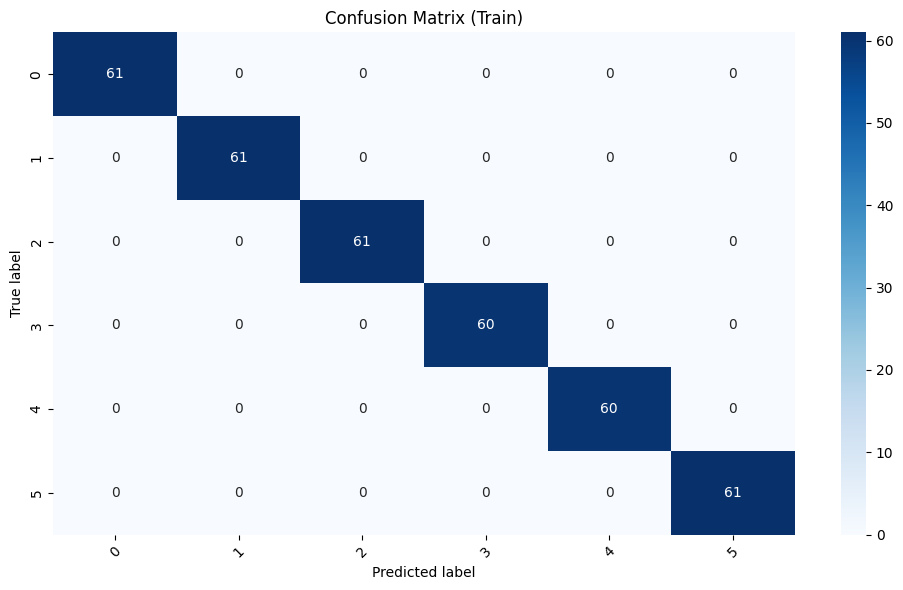

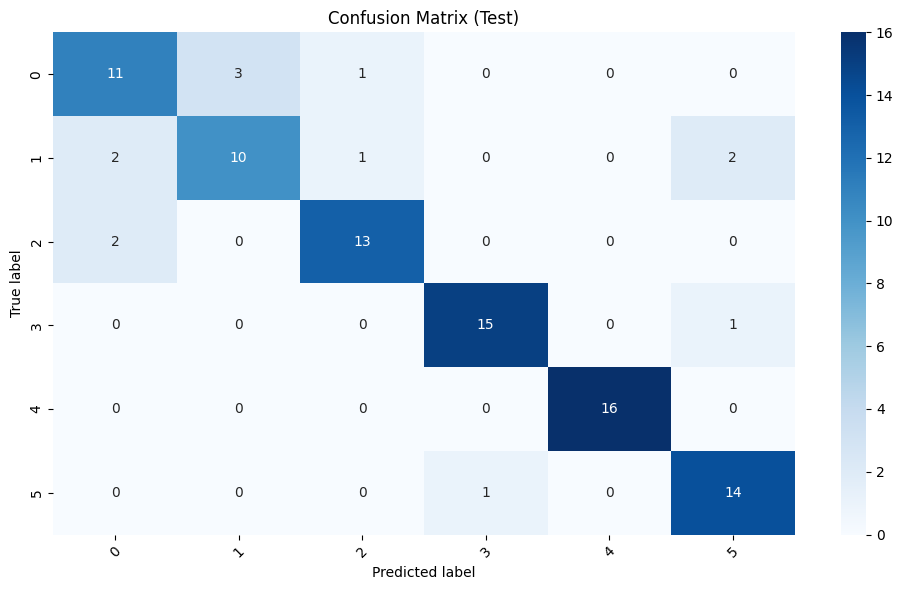

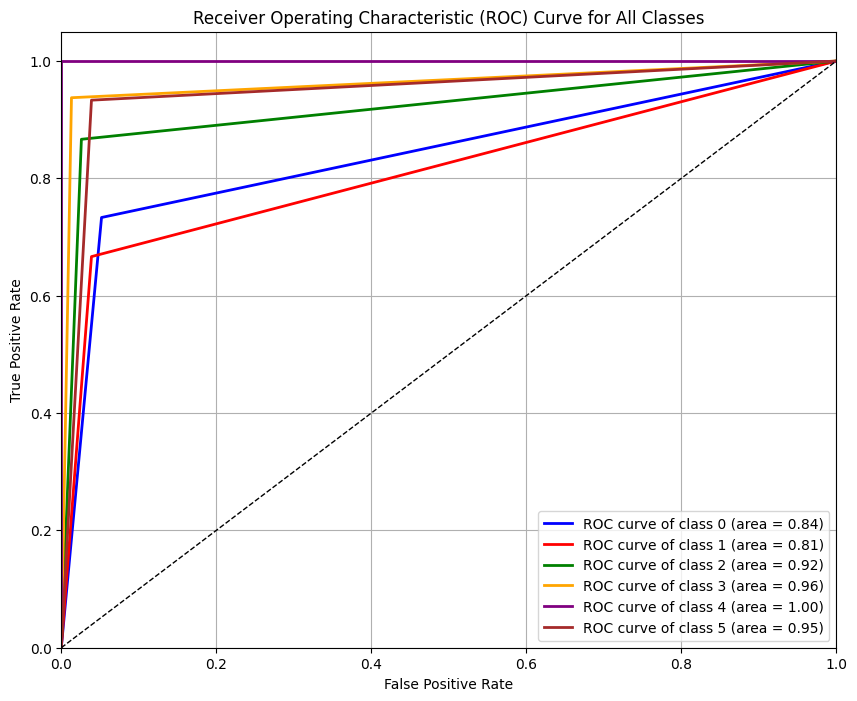

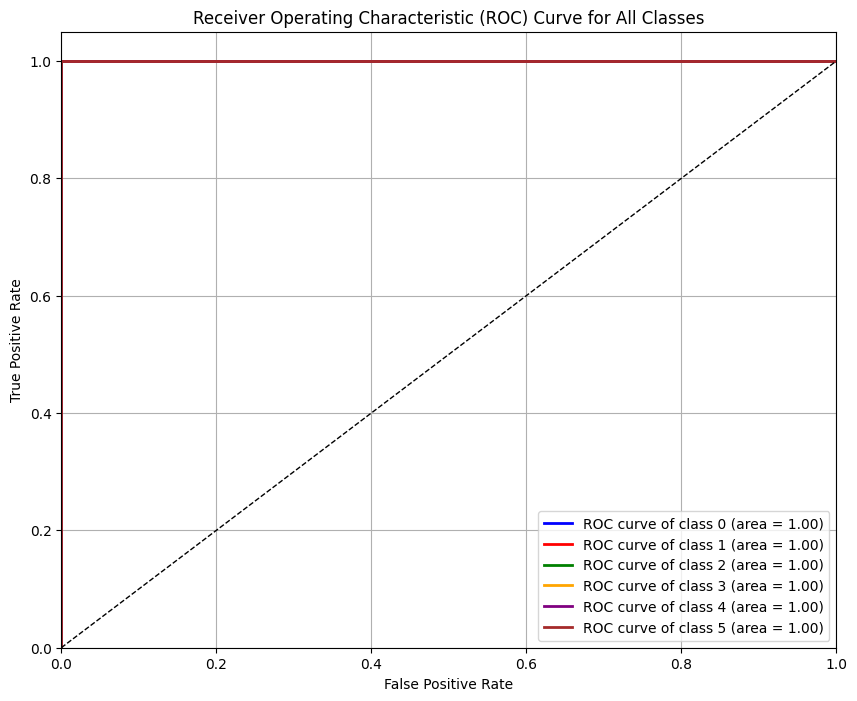

Model Random Forest
Train acc 1.0; Test acc 0.8804347826086957
              precision    recall  f1-score   support

           1       0.68      0.87      0.76        15
           2       0.86      0.80      0.83        15
           3       0.91      0.67      0.77        15
           5       1.00      0.94      0.97        16
           6       1.00      1.00      1.00        16
           7       0.88      1.00      0.94        15

    accuracy                           0.88        92
   macro avg       0.89      0.88      0.88        92
weighted avg       0.89      0.88      0.88        92



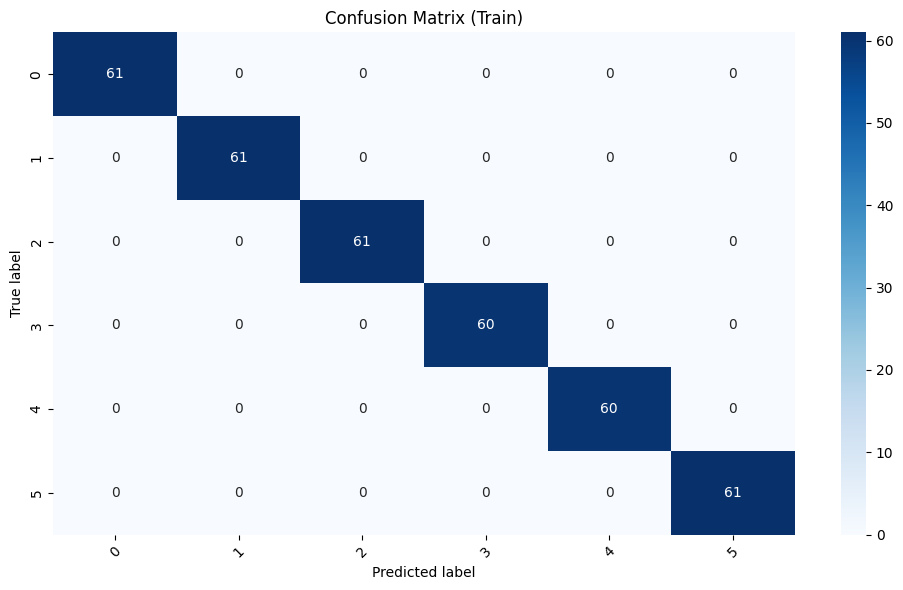

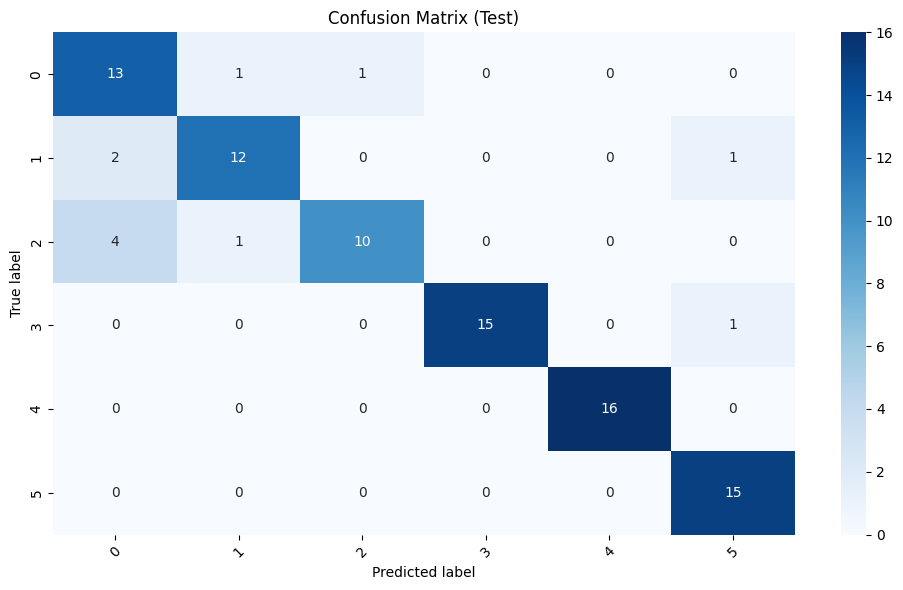

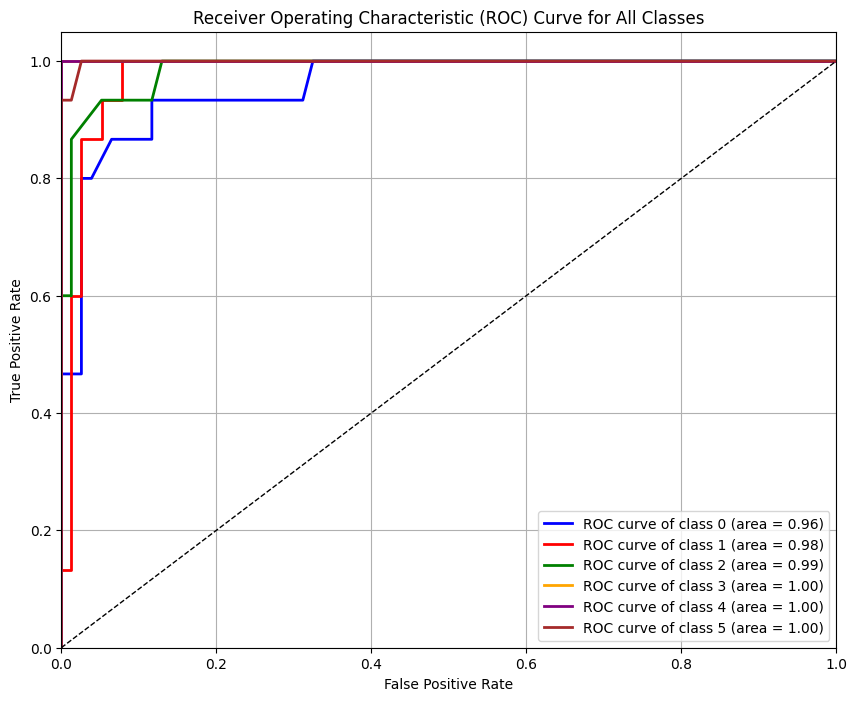

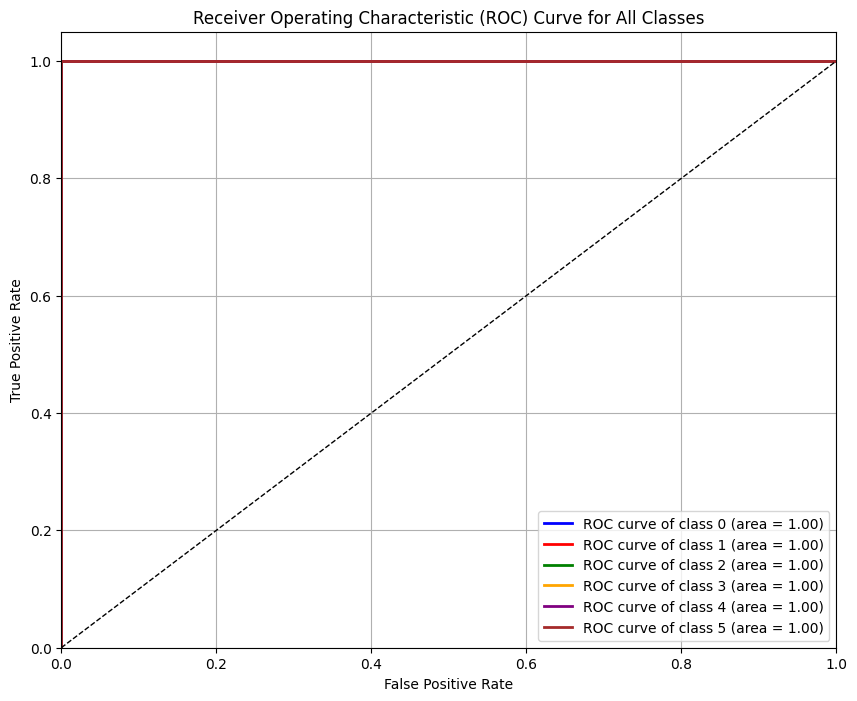

Model Gradient Boosting
Train acc 1.0; Test acc 0.9130434782608695
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.93      0.93        15
           3       1.00      0.73      0.85        15
           5       1.00      0.94      0.97        16
           6       0.89      1.00      0.94        16
           7       0.94      1.00      0.97        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



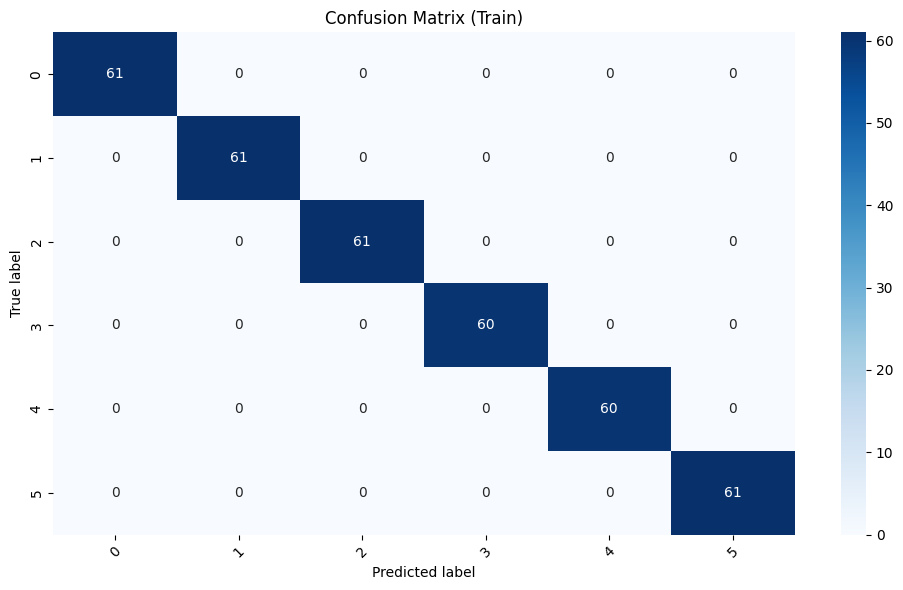

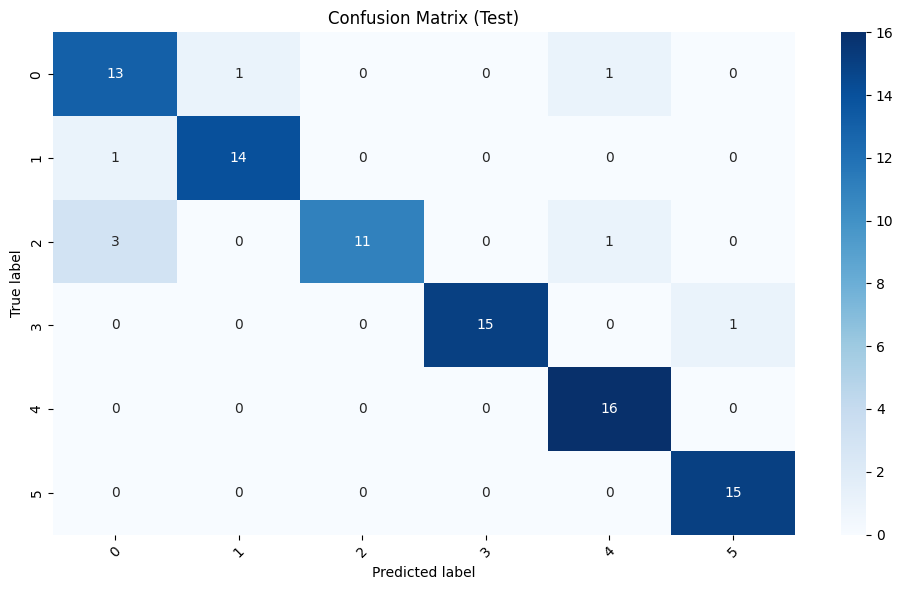

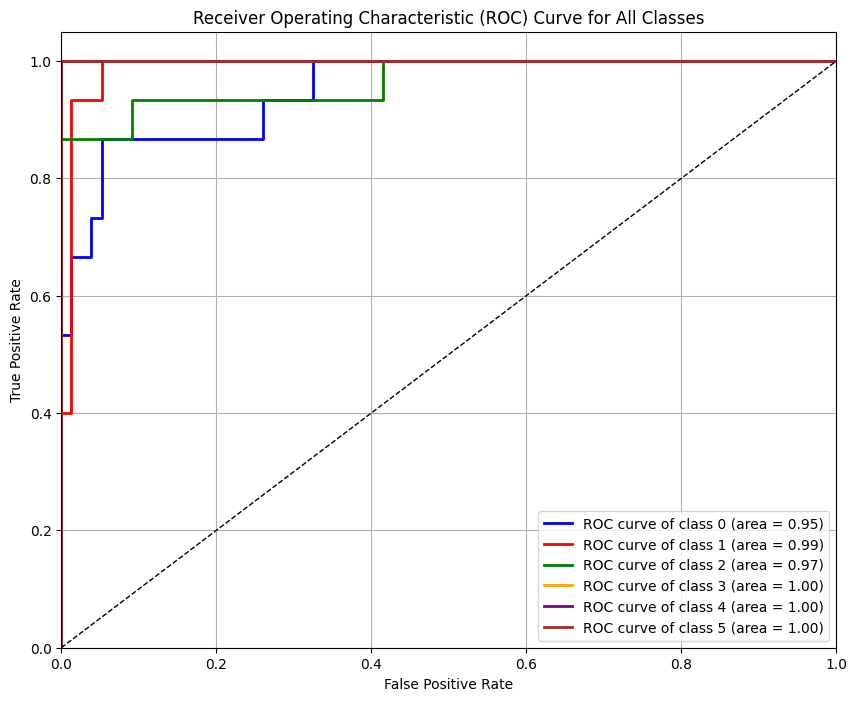

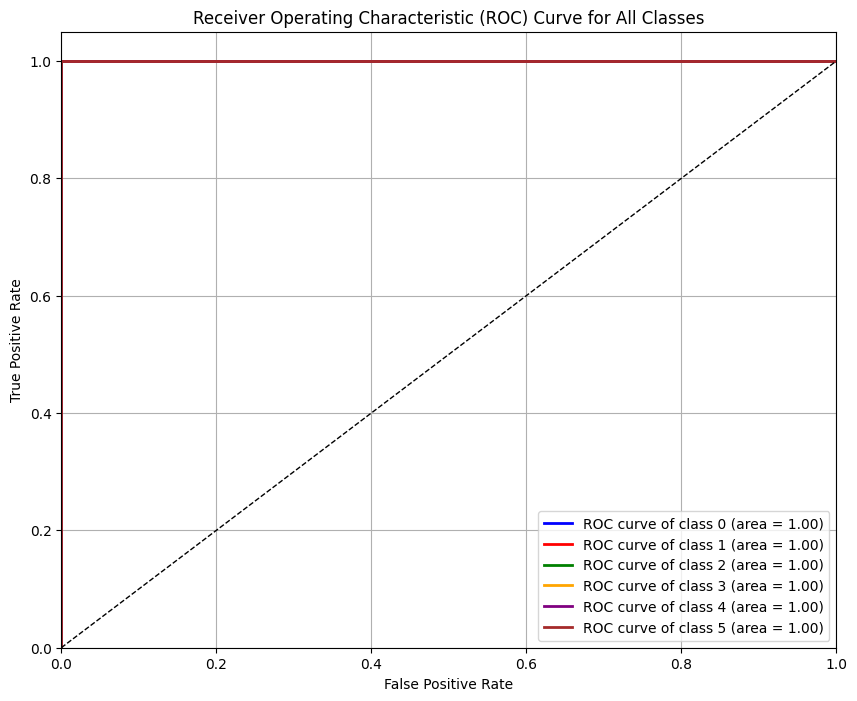

Model AdaBoost
Train acc 0.5164835164835165; Test acc 0.5760869565217391
              precision    recall  f1-score   support

           1       0.38      0.60      0.46        15
           2       0.22      0.13      0.17        15
           3       0.50      0.53      0.52        15
           5       0.56      0.31      0.40        16
           6       1.00      0.88      0.93        16
           7       0.75      1.00      0.86        15

    accuracy                           0.58        92
   macro avg       0.57      0.58      0.56        92
weighted avg       0.57      0.58      0.56        92



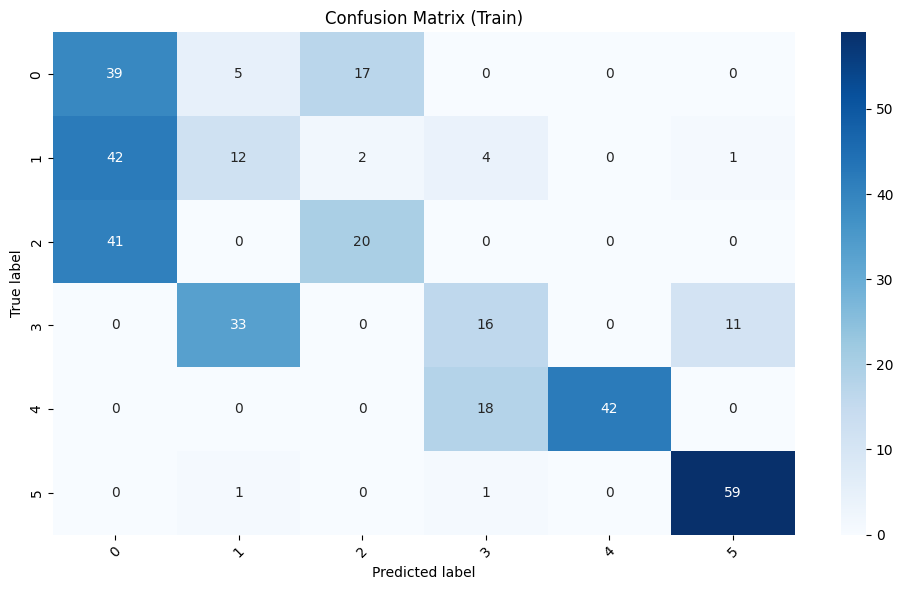

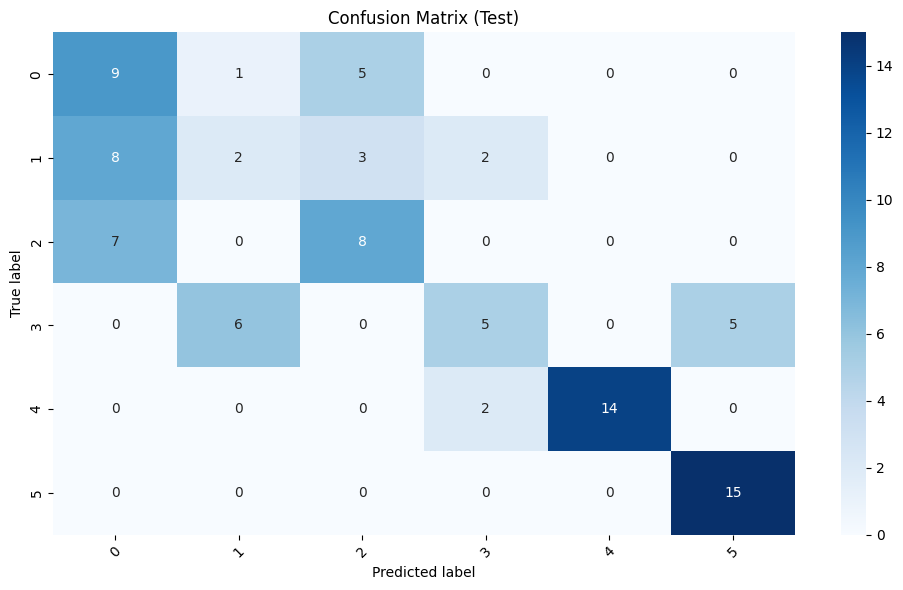

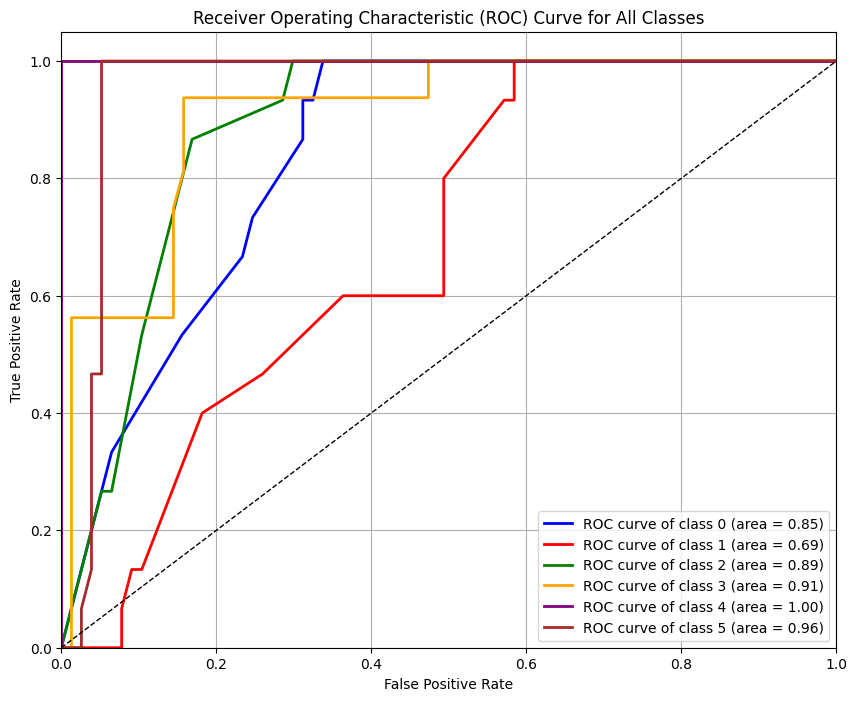

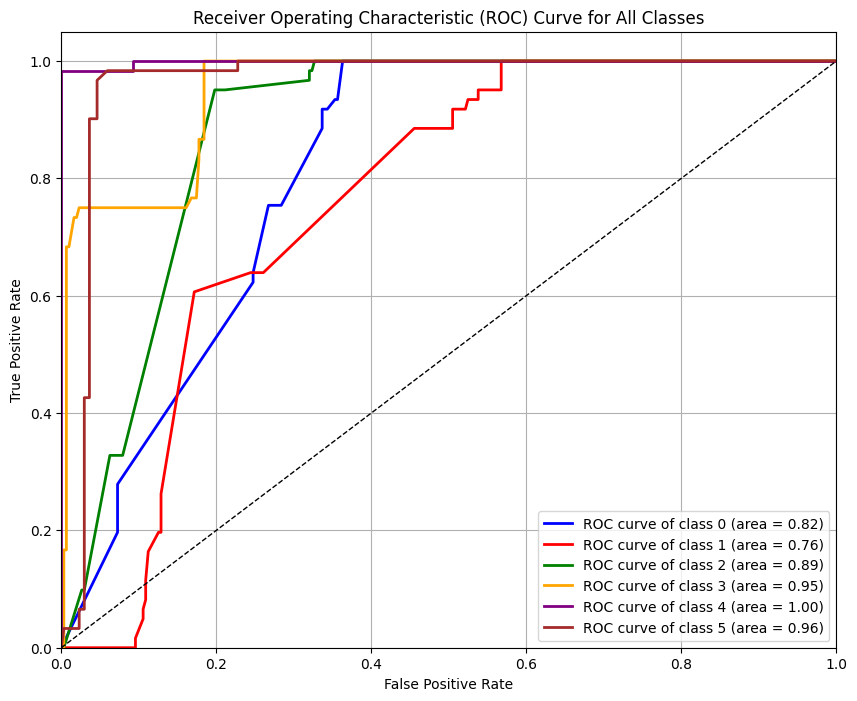

In [37]:
results = []
for (name, model) in models:
  y_pred_train, y_pred_test, train_acc, test_acc = train_model(name, model)

  plot_confusion_matrix(y_train, y_pred_train, title='Confusion Matrix (Train)')
  plot_confusion_matrix(y_test, y_pred_test, title='Confusion Matrix (Test)')

  plot_multiclass_roc(model, X_test, y_test)
  plot_multiclass_roc(model, X_train, y_train)
  results.append({
      "Model": name,
      "Train Accuracy": train_acc,
      "Test Accuracy": test_acc
      })

*Gradient Boosting and Random Forest demonstrate the best results with test accuracy of 0.913 and 0.880, respectively, indicating their high generalization ability, while Decision Tree, despite its perfect accuracy on the training set, shows signs of overfitting with a lower test accuracy of 0.859.*

In [38]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Accuracy,Test Accuracy
0,Naive Bayes,0.678571,0.695652
1,Logistic Regression,0.815934,0.815217
2,SVC Linear,0.854396,0.836957
3,SVC Poly,0.637363,0.554348
4,SVC Rbf,0.876374,0.793478
5,SVC Sigmoid,0.670330,0.652174
6,Decision Tree,1.000000,0.858696
7,Random Forest,1.000000,0.880435
8,Gradient Boosting,1.000000,0.913043
9,AdaBoost,0.516484,0.576087


In [39]:
def accuracy_plot(res_df):
  f, axes = plt.subplots(2,1, figsize=(14,10))

  results_df.sort_values(by=['Train Accuracy'], ascending=False, inplace=True)

  sns.barplot(x='Train Accuracy', y='Model', data = res_df, palette='Blues_d', ax = axes[0], hue='Model', legend=False)
  axes[0].set_xlabel('Train Accuracy', size=16)
  axes[0].set_ylabel('Model')
  axes[0].set_xlim(0,1.0)
  axes[0].set_xticks(np.arange(0, 1.1, 0.1))

  results_df.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

  sns.barplot(x='Test Accuracy', y='Model', data = res_df, palette='Greens_d', ax = axes[1], hue='Model', legend=False)
  axes[1].set_xlabel('Test Accuracy', size=16)
  axes[1].set_ylabel('Model')
  axes[1].set_xlim(0,1.0)
  axes[1].set_xticks(np.arange(0, 1.1, 0.1))

  plt.show()

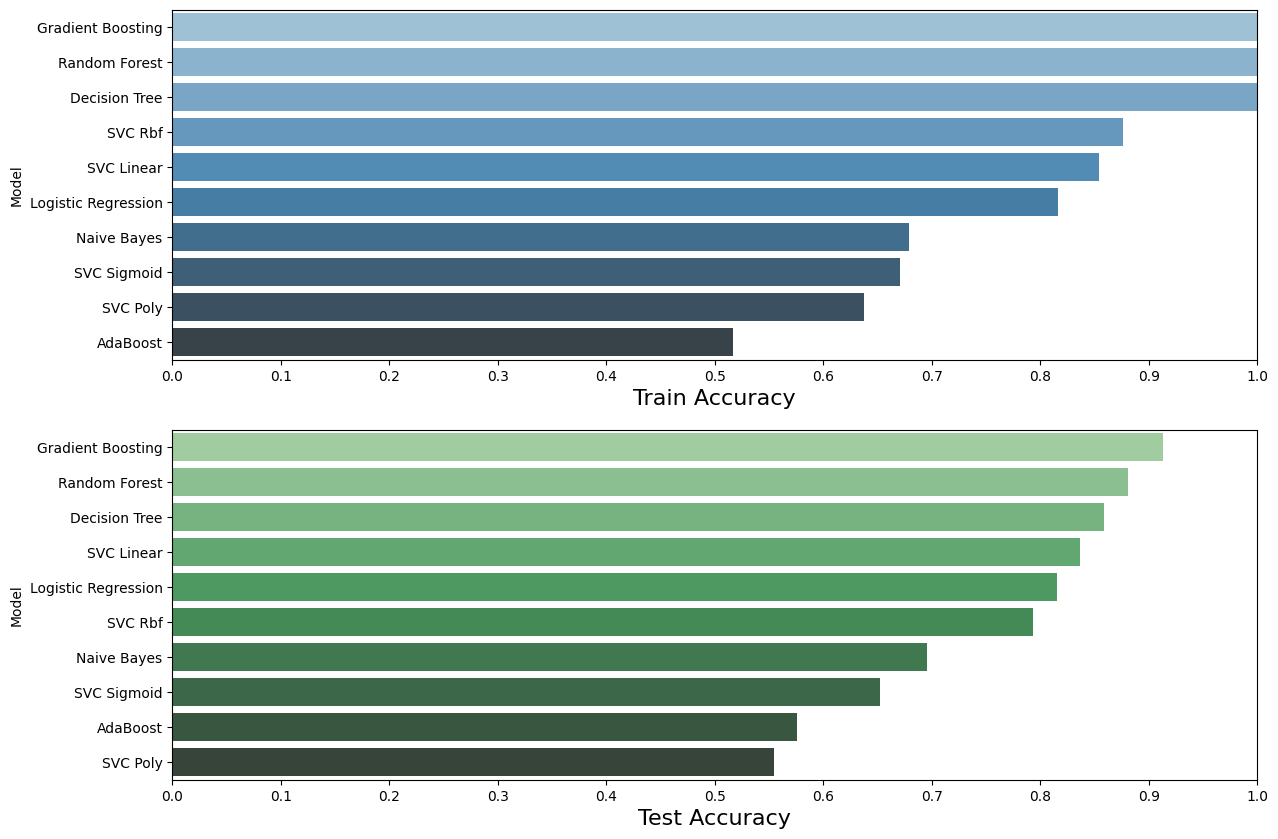

In [40]:
accuracy_plot(results_df)

## 6. Hyperparameter tuning

In [41]:
models_and_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
          'max_depth': [None, 5, 10, 20],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
          'n_estimators': [50, 100, 200],
          'max_depth': [None, 10, 20],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
          'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 0.2],
          'max_depth': [3, 5, 7]
        }
    },
    'SVC Rbf': {
        'model': SVC(kernel='rbf', random_state=42, probability=True),
        'params': {
          'C': [0.1, 1, 10],
          'gamma': ['scale', 'auto', 0.1, 1]
        }
    }
}


Tuning Decision Tree...
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV accuracy: 0.8436
Train accuracy: 0.9725
Test accuracy: 0.8370
              precision    recall  f1-score   support

           1       0.73      0.73      0.73        15
           2       0.67      0.67      0.67        15
           3       0.87      0.87      0.87        15
           5       0.93      0.88      0.90        16
           6       0.94      1.00      0.97        16
           7       0.87      0.87      0.87        15

    accuracy                           0.84        92
   macro avg       0.83      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92



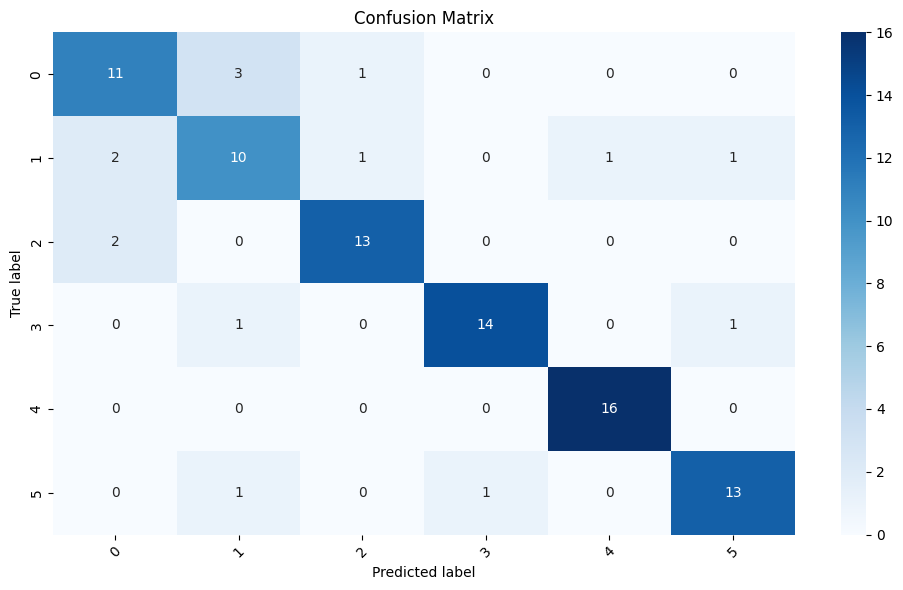


Tuning Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV accuracy: 0.9010
Train accuracy: 1.0000
Test accuracy: 0.9130
              precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.92      0.80      0.86        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.88      1.00      0.94        15

    accuracy                           0.91        92
   macro avg       0.91      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



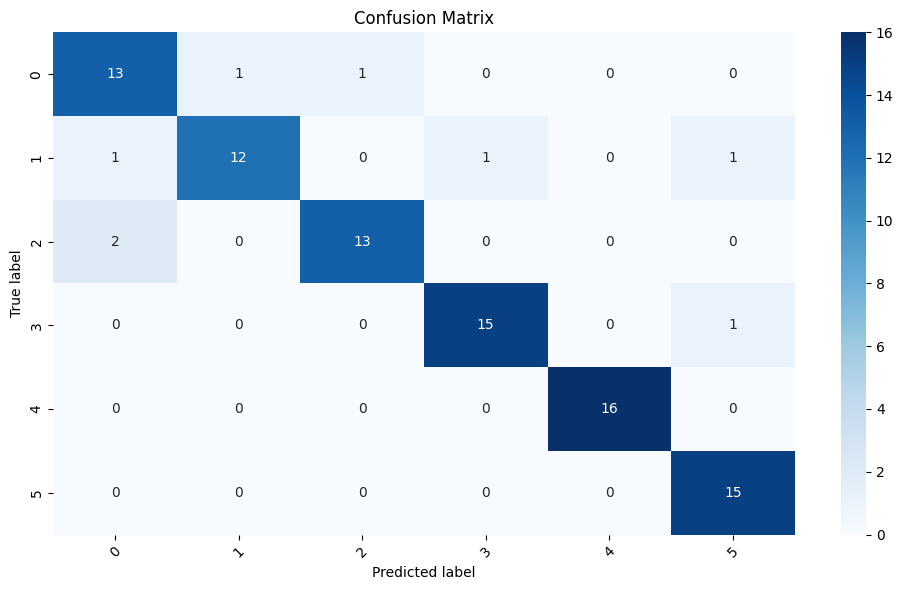


Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best CV accuracy: 0.8984
Train accuracy: 1.0000
Test accuracy: 0.9130
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       1.00      0.94      0.97        16
           6       0.89      1.00      0.94        16
           7       0.94      1.00      0.97        15

    accuracy                           0.91        92
   macro avg       0.91      0.91      0.91        92
weighted avg       0.91      0.91      0.91        92



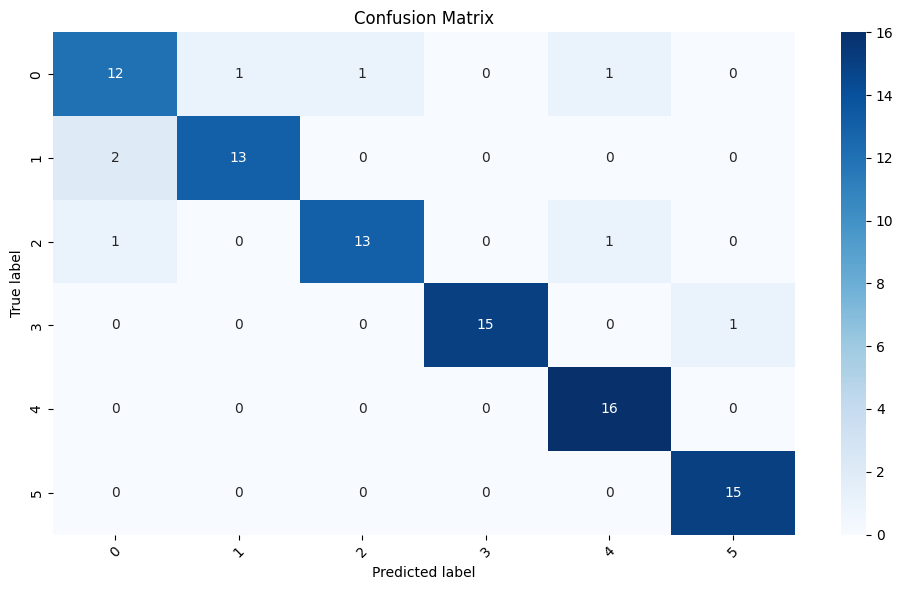


Tuning SVC Rbf...
Best parameters: {'C': 10, 'gamma': 0.1}
Best CV accuracy: 0.8653
Train accuracy: 0.9258
Test accuracy: 0.8370
              precision    recall  f1-score   support

           1       0.62      0.67      0.65        15
           2       0.64      0.47      0.54        15
           3       0.78      0.93      0.85        15
           5       1.00      0.94      0.97        16
           6       1.00      1.00      1.00        16
           7       0.94      1.00      0.97        15

    accuracy                           0.84        92
   macro avg       0.83      0.83      0.83        92
weighted avg       0.83      0.84      0.83        92



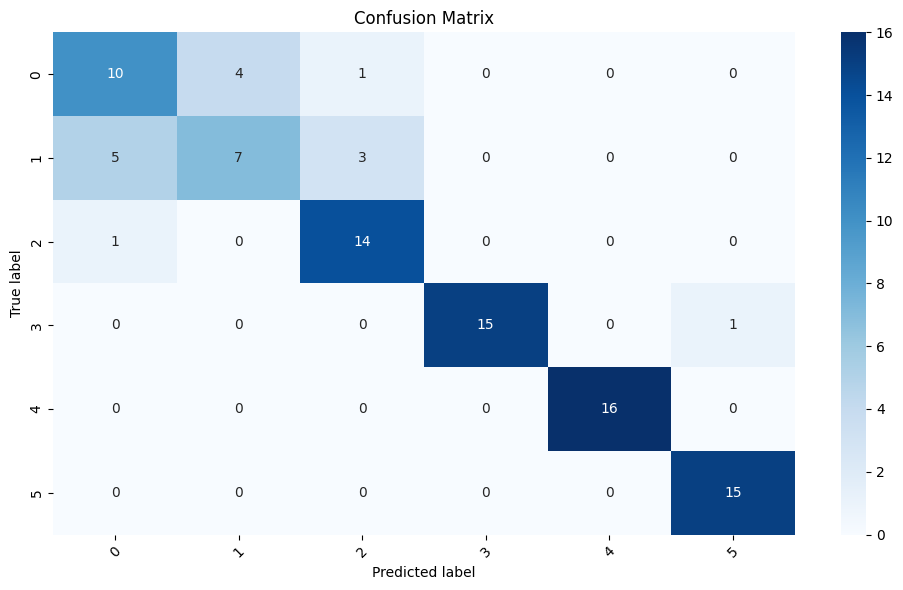

In [50]:
from sklearn.model_selection import GridSearchCV

tuned_models = []
tuned_models_results = []
for name, config in models_and_params.items():
    print(f"\nTuning {name}...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5, scoring='accuracy',
        n_jobs=-1
        )
    grid_search.fit(X_train, y_train)

    optimized_model = grid_search.best_estimator_

    y_pred_test = optimized_model.predict(X_test)

    train_acc = accuracy_score(y_train, optimized_model.predict(X_train))
    test_acc = accuracy_score(y_test, y_pred_test)

    tuned_models.append((f'Tuned {name}', optimized_model))

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV accuracy: {grid_search.best_score_:.4f}")
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")

    tuned_models_results.append({'Model': f"{name}", 'Train Accuracy': train_acc, 'Test Accuracy': test_acc})

    report = classification_report(y_test, y_pred_test)
    print(report)

    plot_confusion_matrix(y_test, y_pred_test)

In [43]:
tuned_results_df = pd.DataFrame(tuned_models_results)
tuned_results_df

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.972527,0.836957
1,Random Forest,1.000000,0.913043
2,Gradient Boosting,1.000000,0.913043
3,SVC Rbf,0.925824,0.836957


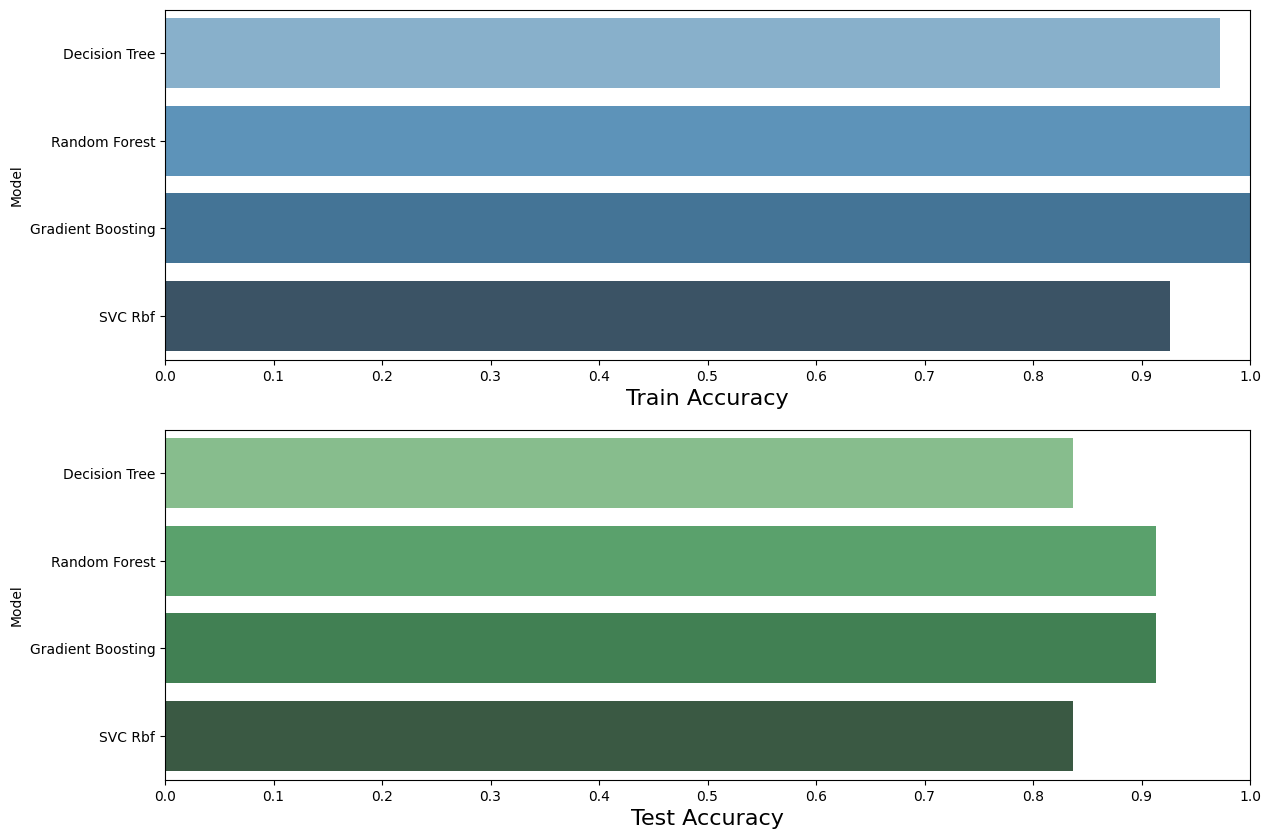

In [44]:
accuracy_plot(tuned_results_df)

In [45]:
merged_df = pd.merge(
    results_df,
    tuned_results_df,
    on='Model',
    suffixes=('', ' (Tuned)')
)

base_tuned_df = merged_df[['Model', 'Train Accuracy', 'Test Accuracy', 'Train Accuracy (Tuned)', 'Test Accuracy (Tuned)']]

base_tuned_df

,Model,Train Accuracy,Test Accuracy,Train Accuracy (Tuned),Test Accuracy (Tuned)
0,Gradient Boosting,1.000000,0.913043,1.000000,0.913043
1,Random Forest,1.000000,0.880435,1.000000,0.913043
2,Decision Tree,1.000000,0.858696,0.972527,0.836957
3,SVC Rbf,0.876374,0.793478,0.925824,0.836957


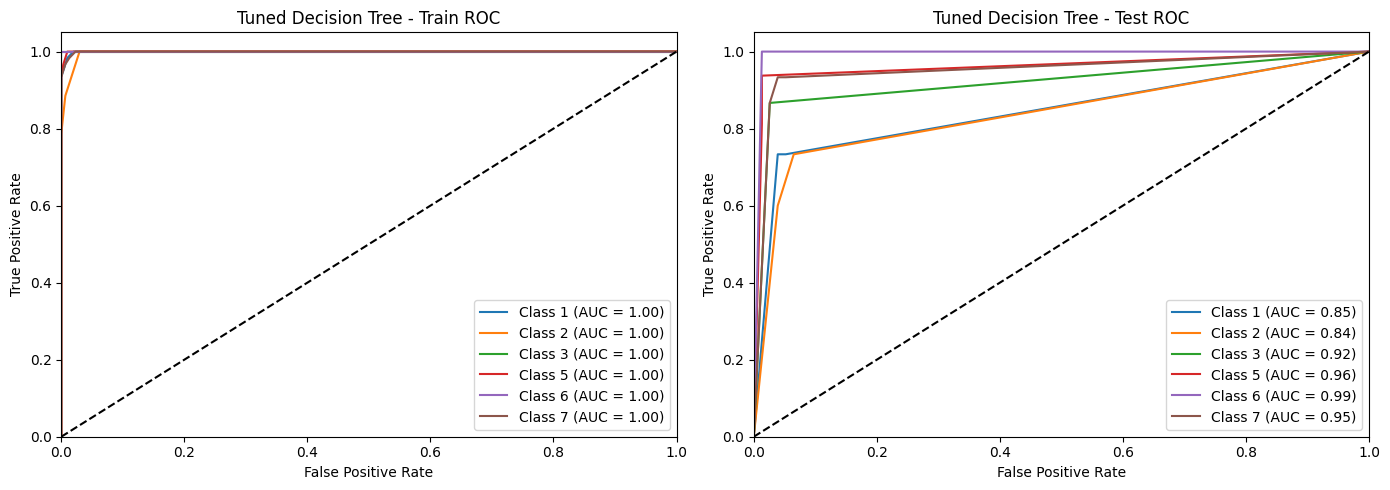

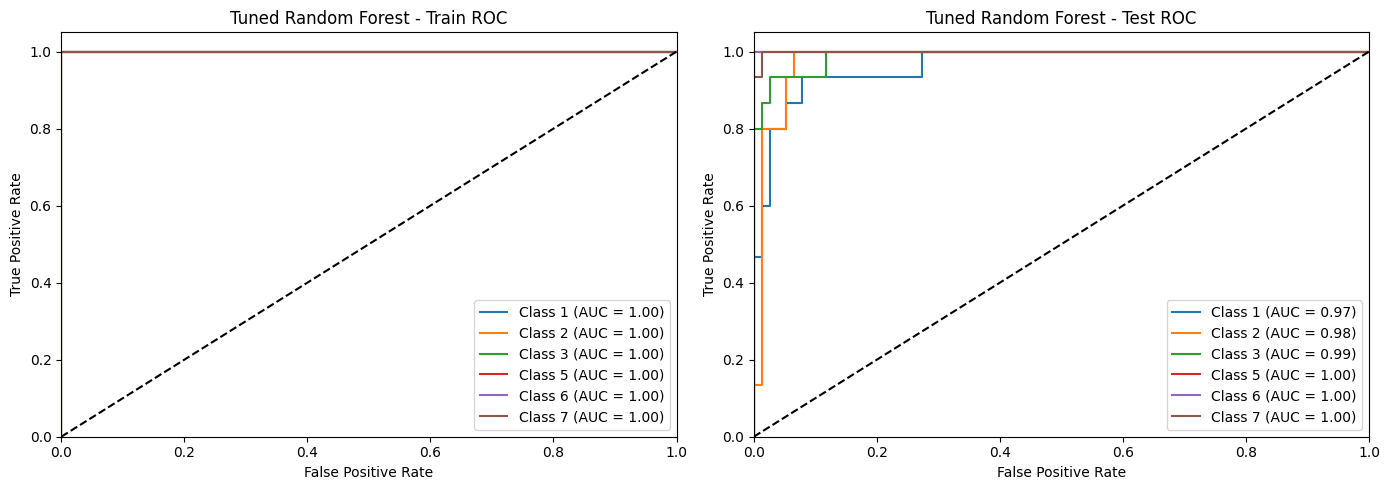

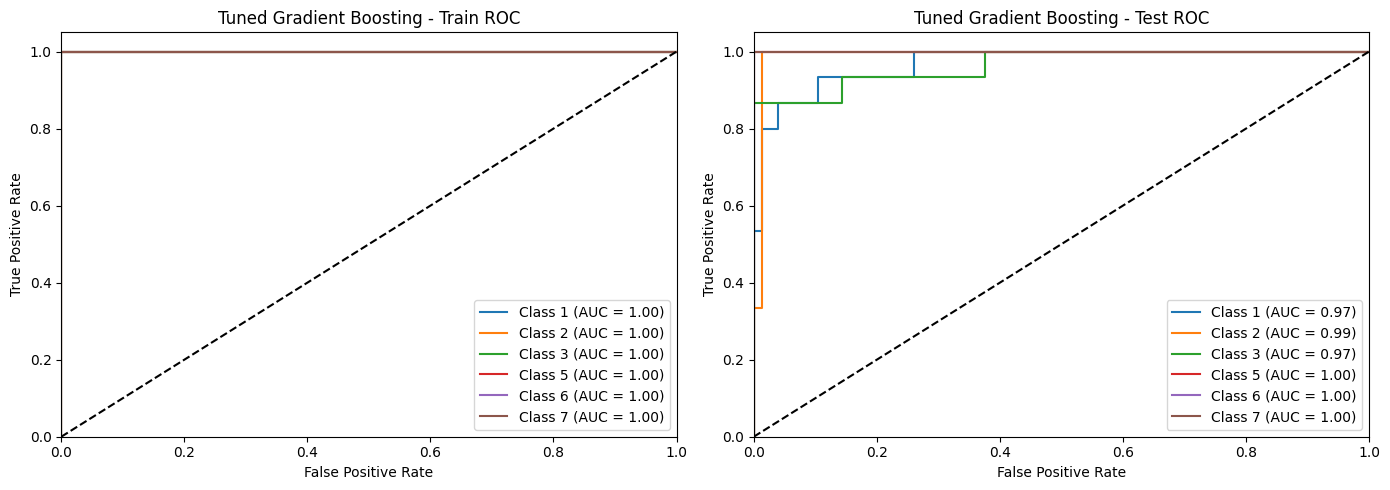

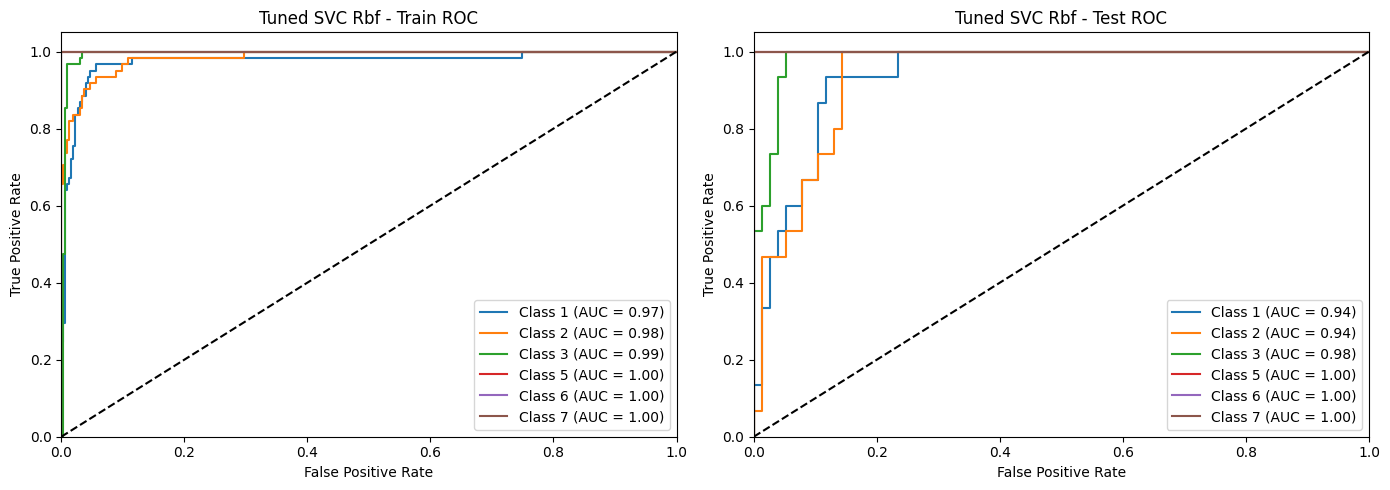

In [48]:
from sklearn.preprocessing import LabelBinarizer

for name, model in tuned_models:
    lb = LabelBinarizer()
    y_train_bin = lb.fit_transform(y_train)
    y_test_bin = lb.transform(y_test)
    classes = lb.classes_

    y_score_train = model.predict_proba(X_train)
    y_score_test = model.predict_proba(X_test)

    fpr_train = {}
    tpr_train = {}
    roc_auc_train = {}
    fpr_test = {}
    tpr_test = {}
    roc_auc_test = {}

    for i in range(len(classes)):
        fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_score_train[:, i])
        roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

        fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_score_test[:, i])
        roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    for i in range(len(classes)):
        axes[0].plot(fpr_train[i], tpr_train[i], label=f'Class {classes[i]} (AUC = {roc_auc_train[i]:.2f})')
        axes[1].plot(fpr_test[i], tpr_test[i], label=f'Class {classes[i]} (AUC = {roc_auc_test[i]:.2f})')

    for ax, title in zip(axes, [f'{name} - Train ROC', f'{name} - Test ROC']):
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(title)
        ax.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

*Hyperparameter tuning significantly improved the accuracy on the test set for SVC Rbf and Random Forest, increasing their generalization ability, while Decision Tree showed a slight decrease in accuracy, which may indicate overfitting.*

*Random Forest and Gradient Boosting achieved the highest accuracy scores on the test set (0.913043), with Random Forest benefiting from tuning, and Gradient Boosting maintaining optimal performance with default parameters, making them the most reliable for this classification task.*